# 统计分析-回归分析与分类分析

# 0. 概述与大纲

## 0.1 从建模的目的看回归

回归分析与分类分析都是一种基于统计模型的统计分析方法。它们都研究因变量（被解释变量）与自变量（解释变量）之间存在的潜在关系，并通过统计模型的形式将这些潜在关系进行显式的表达。不同的是，回归分析中因变量是连续变量，如工资、销售额；而分类分析中因变量是属性变量，如判断邮件'是or否”为垃圾邮件。

上一段我们提到，回归是一种基于统计模型的分析方法，因此回归分析的过程本质上一种建模过程。统计建模的主要任务有二：预测与推断。

所谓预测，就是利用一个训练完毕的模型$\hat{f}$，根据输入的自变量$X$获得对应的输出$Y$。在预测任务中，如果模型$\hat{f}$可以准确地提供预测，那么$\hat{f}$是什么形式并不重要，而如果$\hat{f}$的形式非常复杂且难以解释，我们可以将之称为黑盒模型(Black Box)。举一个例子，假设$X_1,X_2,\cdots ,X_p$是某个病人的血样特征，$Y$测量了病人使用药物后出现严重不良反应的风险，那么如果存在一个模型可以很好地通过$X$以预测$Y$，那自然是再好不过的事了。此时，模型的形式、变量之间的关系在正确预测面前都显得不那么重要。事实上，当前具有强大预测性能的模型大多都是黑盒模型，如强大的Xgboost机器学习算法以及各种深度学习算法，它们的模型可解释性差，我们难以解释其中一些参数的含义与统计性质。

与预测相对应的另一任务便是推断。在很多情况下，我们对当$X_1,X_2,\cdots ,X_p$变化时**如何影响**$Y$更感兴趣，此时，我们估计模型$\hat{f}$的目的不是为了预测$Y$，而是想明白两者之间的关系，更深层次地讲，我们想要知道模型内各种参数的数值与统计推断性质等等。在这种情况下，模型的可解释性就非常重要了，而通常我们在推断任务中最常使用的模型正是线性回归模型。举一个例子，在研究各因素对商品销售量的场景中，我们会更关注以下问题：哪类媒体对销量有直接的贡献？增加电视广告费用能对销售量带来多少程度的增加？等等，这就是典型的推断问题。

弄清楚了预测与推断的区别，我们重新审视一下回归分析：回归分析更加注重对因变量与自变量之间潜在关系的推断，所使用的统计模型也相对简单（一般为线性模型），如果你在比赛中需要分析各变量间的潜在相关关系，便可以考虑使用回归分析。





## 0.2 课程大纲

在本轮课程，我们将先后学习回归分析与分类分析的知识。其中，回归分析中我们主要学习经典线性模型(CLM, Classical Linear Model)与最小二乘估计(OLS)，广义线性模型(GLM)只做简单介绍；分类分析中我们主要学习基于线性模型的Logistics模型与Probit模型。具体大纲如下：

· 回归的思想与线性回归模型介绍

· OLS估计在经典线性回归模型假设下的统计推断

· 线性回归模型中的参数检验

· 线性回归模型设定的误差分析

· 异方差下回归建模的解决方法

首先，我们将了解回归的基本思想，并对最常用的回归模型-经典线性模型的模型形式、模型假设（也称为CLM假设）做基本的介绍。

知晓了模型的形式后，下一步自然是进行模型参数的估计，并推断估计参数的统计性质。在线性模型中，这些参数就是每个自变量的系数，我们想知道：使用何种方法进行参数估计呢？参数在这种估计方法下能否接近真实参数呢？估计的误差有多大呢？我们将学习使用最小二乘法(OLS)对线性模型进行估计，并探究OLS估计下各参数的统计性质。可以告诉大家，在满足CLM假设的前提下，OLS估计是经典线性模型最优的参数估计法；基于CLM假设与OLS估计，我们便可以对模型进行各种假设检验，包括参数显著性检验，模型显著性检验等等。

然而，理想很丰满，现实很骨感，我们所获得的实验数据不总是能满足CLM假设中的每一条假设。某个假设不成立会给模型参数估计的准确性（无偏性）、稳定性（方差）以及假设检验带来多少影响呢？这就是模型设定误差分析需要研究的内容。最后，若数据不满足CLM假设中的某个假设，需要找到对应的解决办法，在本轮课程，我们重点探讨不满足同方差假设下参数估计方法与参数检验方法的改进。

# 1. 回归模型总述

在这一章节，我们将对'回归”进行宏观的介绍，使大家对回归有直观的理解。

## 1.1 回归思想与一般回归模型

### 1.1.1 横截面数据

横截面数据是回归分析最主要的分析数据类型，它可以视为在**同一时间点（或抽样时间差异可以被忽略）**上对**多个抽样个体**的观测数据。通常，我们记第$i$个个体的观测数据为$(x_i,y_i)$。如果以抽样时间点与抽样个体数目为维度划分数据类型，除了横截面数据外，还有时间序列数据以及面板数据。时间序列数据为单个个体在不同时间点上的观测数据，而面板数据则是多个个体在不同时间点上的观测数据。对时间序列数据的分析需要用到时间序列分析的知识，对面板数据的分析则是高级计量经济学的内容，在本次课程我们不对它们做介绍。三者的区别如下图所示：

<img src="./images/横截面数据.png">

### 1.1.2 回归思想——条件均值建模

横截面数据最重要的一个特征，就是我们可以将采集的数据$(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$近似视为来自一个潜在总体的随机样本，即假设
$$
\left(x_{1}, y_{1}\right), \cdots,\left(x_{n}, y_{n}\right) \sim^{i i d}(x, y)
$$
我们进行数据分析的最终目的是为了找到$x$与$y$之间的关系并用模型显性表示出来，此时最理想的状态是使用一个**条件分布**刻画$x$对$y$的影响
$$
F_{y \mid x}
$$
即在任意给定$x$的条件下都有一个明确的分布$F$刻画$y$的状态。但是在实际问题中，直接估计这个条件分布几乎是一件不可能的事，且我们也难以对分布进行解释与应用。于是，我们退而求其次通过分布的一般数字特征对两者的关系进行推断，如条件分布的中心位置，形状，即考虑**条件均值、条件方差**
$$
E(y \mid x), \operatorname{Var}(y \mid x)
$$
而回归正是利用条件均值$E(y \mid x)$来刻画$x$与$y$的关系，回归建模的本质也正是'条件均值的建模”。那么，怎么理解条件均值建模呢？我们举一个不典型的例子帮助大家理解。

假设某个样本量为100的数据集中，自变量$x$有1,2,3,4,5五个值，样本的因变量$y$都来自以其自变量为均值，方差为1的正态分布。我们想要刻画因变量与自变量之间的变化关系，就要找出可以代表各种类样本内（在此例中以自变量为划分依据）共性的特征，用这些特征来描绘变化关系。最直观也是最简单的特征就是条件均值，即给定$x$的条件下样本的均值。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display

Text(0.5, 1.0, 'E(Y|X)')

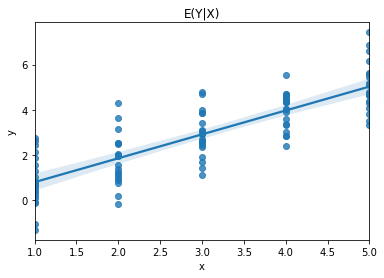

In [2]:
x=list()
y=list()
for i in [1,2,3,4,5]:
    y_norm=stats.norm.rvs(i,1,20,random_state=i).tolist()
    y.extend(y_norm)
    x1=np.ones(20)*i
    x1=x1.tolist()
    x.extend(x1)

data={'x':x,'y':y}
df=pd.DataFrame(data)

sns.regplot(x='x',y='y',data=df)
plt.title('E(Y|X)')

根据上图我们可以看出，$E(y|x=1)=1$,$E(y|x=2)=2$,…,$E(y|x=x_0)=x_0$。通过条件均值，我们可以推断出$x$与$y$的关系可以用模型$y=x+u$来刻画，其中，$u$被称为随机误差，可理解为：除$x$外，其他影响$y$取值的因素。

### 1.1.3 一般回归模型

在上述例子中，我们使用模型$y=x+u$刻画了$x$与$y$的关系，这说明了在这个数据集中我们将模型设定为了
$$
y=x+u
$$
事实上，如果我们将上述公式中的$x$泛化成条件均值$E(y|x)$，那么我们就能得到最一般的回归模型
$$
y=E(y|x)+u
$$
这也就意味着，所谓回归模型的建模，**本质上就是条件均值建模**

**· 回归模型的条件解读**

一般回归模型$y=E(y|x)+u$暗含了一个天然成立的假设：
1. 随机误差的条件期望$E(u|x)=0$

利用重期望公式，我们可以根据假设1进一步推得下面两个推论:

推论1. 随机误差的无条件期望$E(u)=0$——这表示其他因素对$y$的平均影响为0
<br>
推论2. 随机误差$u$与自变量$x$协方差$Cov(u,x)=0$——这表示其他因素与参与回归的$x$不相关！

根据假设1，我们可以将一般回归模型表示成一种新的形式：
$$
y=E(y|x)+u\Longleftrightarrow y=m\left( x \right) +u, where\,\,E\left( u|x \right) =0
$$
在这里，$E(u|x)=0$等价于$m(x)=E(y|x)$。事实上，用这一种形式表示回归模型更常见，也更有利于接下来对模型$m(x)$具体形式的假定，因为这告诉了我们：只要假定随机误差$u$与$x$不相关（这里可理解为其他影响$y$的外生因素与内生因素$x$不相关），我们就可以根据需要假定回归模型的具体形式。

## 1.2 线性回归模型

### 1.2.1 线性模型形式

上面的学习中我们介绍了回归模型的一般形式。在实际建模中，为了有效的估计，我们必须对模型中$m(x)$的形式进行具体的假定。在所有模型假定形式中，线性回归模型是最常用假定形式，也是回归分析中最重要的模型，是本次课程重点讲解的内容。

线性模型假设有：
$$
m(x)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}
$$
于是，线性回归模型可表示为：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}+u, \quad E\left(u \mid x_{1}, \cdots, x_{p}\right)=0
$$
回归分析主要研究如何有效地估计模型中的参数$\hat{\beta}_i$，并利用模型进行推断与预测。

### 1.2.2 从简单线性回归到多元线性回归

**· 用简单线性回归理解对模型的解释**

为大家快速理解线性回归模型，我们先假设$x$是一维的，即只考虑一个因素对$y$的影响，此时亦称模型为简单线性回归，形式为
$$
y=\beta_{0}+\beta_{1} x+u, \quad E(u \mid x)=0
$$
$\beta_{0}$是截距项，可以理解为$x=0$时$y$的期望值，一般情况下，如果我们回归的任务是推断，则截距通常不重要；
<br>
$\beta_{1}=\frac{\Delta m(x)}{\Delta x}$，可理解为$x$每增加一个单位，$y$**平均**增加$\beta_1$个单位。

此后，我们将默认模型含有$E(u|x)=0$的设定（因为只有这样模型才代表回归模型），该条件不再以书面形式写出。

我们举一个例子帮助大家理解：

**Example1.** 假设大学成绩colGPA与大学测验水平ACT间关系为
$$



\text { colGPA }=\beta_{0}+\beta_{1} \text { hsGPA }+u
$$
$\beta_1$系数的解释为：每增加1单位大学测验水平，大学成绩会增加$\beta_1$个单位；由于该模型中自变量只有高中成绩，而大学成绩水平肯定还受其他因素影响，因此该模型中的随机误差包含了如高中成绩、自主学习能力等因素。

注意：设定$E(u|x)=0$的存在暗含了**在该模型中**高中测验成绩、自主学习能力等因素与自变量大学测验水平无关，但这在**实际问题中**未必成立。而一旦它们存在相关性，就意味着模型假设不符合实际情况，模型估计的有效性与准确性也将受到影响。

**· 进行全面的回归建模——多元线性回归**

单纯的简单线性模型有很大的局限性，原因有二：

1、在实际问题中，因变量$y$通常受多个因素影响，这些因素之间可能彼此之间存在线性相关性（后续的学习中我们将这种现象称为多重共线性），而默认假设$E(u|x)=0$的直接推论(推论2)就是其他影响因素与$x$线性无关，显然不一定符合实际情况。

2、如果我们想推断一个变量对另一个变量的因果关系，就要保持尽可能多的其他因素的不变，因此需要尽量把关键因素纳入到回归模型当中，这样便可以控制多个变量，查看某个特定变量变化对自变量的影响。

因此在实际问题中，我们更多地使用多元线性回归。一般的多元线性回归模型可写成：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
$u$依旧为随机误差项，它表示除$x_1$,…,$x_k$以外的其他因素对因变量$y$的影响，且同样满足假设
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
$\beta_i=\frac{\partial m\left( x \right)}{\partial x_i}$是回归函数对变量$x_i$的偏导数，它被解释为**在保持其他自变量不变的情况下，$x_i$每增加一单位，$y$平均增加$\beta_i$个单位**

**· Example2.** 依旧以上面的大学成绩例子为例，这一次我们增加一个高中成绩hsGPA变量，此时模型变为
$$
\mathrm{colGPA}=\beta _0+\beta _1\mathrm{hsGPA}+\beta _2\mathrm{ACT}+u
$$
在模型增加了一个我们认为非常重要的变量后，模型的估计会产生怎样的变化呢？我们使用python对该例的数据集进行回归分析，比较两种模型的区别。具体的python实现过程我们将稍后介绍，大家只需要关注这里的结果即可。

In [3]:
import statsmodels.api as sm

In [4]:
# 加载数据
gpa1=pd.read_stata('data/gpa1.dta')

# 在数据集中提取自变量
X1=gpa1.ACT
X2=gpa1[['ACT','hsGPA']]
# 提取因变量
y=gpa1.colGPA

# 为自变量增添截距项
X1=sm.add_constant(X1)
X2=sm.add_constant(X2)
display(X2)

,const,ACT,hsGPA
0,1.0,21.0,3.0
1,1.0,24.0,3.2
2,1.0,26.0,3.6
3,1.0,27.0,3.5
4,1.0,28.0,3.9
...,...,...,...
136,1.0,23.0,3.3
137,1.0,25.0,3.6
138,1.0,21.0,3.4
139,1.0,26.0,3.7


In [5]:
# 拟合两个模型
gpa_lm1=sm.OLS(y,X1).fit()
gpa_lm2=sm.OLS(y,X2).fit()

# 输出两个模型的系数与对应p值
p1=pd.DataFrame(gpa_lm1.pvalues,columns=['pvalue'])
c1=pd.DataFrame(gpa_lm1.params,columns=['params'])
p2=pd.DataFrame(gpa_lm2.pvalues,columns=['pvalue'])
c2=pd.DataFrame(gpa_lm2.params,columns=['params'])
display(c1.join(p1,how='right'))
display(c2.join(p2,how='right'))

,params,pvalue
const,2.402979,8.798591e-16
ACT,0.027064,1.389927e-02


,params,pvalue
const,1.286328,0.000238
ACT,0.009426,0.383297
hsGPA,0.453456,0.000005


我们发现，变量ACT在两个回归模型中的系数并不一致，且其在单独回归时变量显著，但增添了变量hsGPA后变得不显著。这说明多个变量共同回归绝不等同于多个变量各自进行单变量回归，且在后面的课程中我们会知道将多个重要变量都纳入回归模型的重要性。总之，大家在此只需要知道：**多元线性回归非常重要，后续的学习也将围绕多元线性回归展开！**

# 2. 模型系数的估计方法——OLS估计及其性质

在第一章，我们了解了回归的本质——条件均值建模、介绍了最经典的回归模型——（多元）线性回归模型的形式、参数解释与一些注意事项。那么接下来有一个非常自然而然的问题摆在我们面前——你这个线性回归模型里的参数是使用什么方法计算出来的呢？按照你这种方法计算出来的参数是否可靠呢？它们又具备哪些统计性质呢？那么这一章，我们将学习线性回归中最常用、最经典的系数估计方法——普通最小二乘估计法(Ordinary Least Squares, OLS)

## 2.1 OLS估计的思想与原理

### 2.1.1 OLS估计的思想

我们用一个关于储蓄与收入间关系的例子解释ols估计的思想。将储蓄savings视作因变量$y$，将收入income视作自变量$x$，由于只有一个自变量，因此可用简单线性回归模型假设两者关系为$y=\beta_{0}+\beta_{1} x+u$，即一条带有趋势与截距的直线。那么，这条直线应该'长成”怎样才算是一条'好的直线”呢？直观上看，最佳的拟合直线应该尽可能的贴合样本点，如下图所示


<img src='./images/ols.png'>

直线尽可能贴合样本点，意味着在所有直线当中，我们要选出一条离所有样本点距离的总和最小的直线。那么，这个距离该如何衡量？我们将模型回归参数分别记为$\hat{\beta}_{0}$，$\hat{\beta}_{1}$，并定义$\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{i}$为样本在自变量为$x_i$下的拟合值，记样本实际观测值$y_i$与拟合值$\hat{y}_{i}$之差为拟合残差$
\hat{u}_{i}=y_{i}-\hat{y}_{i}$。

不同的距离定义方法是不同估计法的一大区别，OLS对距离的定义是：残差的平方${\hat{u}_i}^2$。因此OLS估计的思想是：**OLS估计求得的系数$\hat{\beta}_{0}$、$\hat{\beta}_{1}$，将使直线与所有样本的拟合残差的平方和最小**，即
$$
\left(\hat{\beta}_{0}, \hat{\beta}_{1}\right)=\operatorname{argmin} \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i}\right)^{2}
$$
对于多元线性回归，OLS估计的思想也完全相同，只不过多元线性回归的模型不是一条直线，而是一个多维的超平面。对于多元线性回归的OLS估计目标函数，有
$$
\left( \hat{\beta}_0,\cdots ,\hat{\beta}_k \right) =\mathrm{arg}\min \sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{1i}-\hat{\beta}_kx_{ki} \right) ^2}
$$

### 2.1.2 OLS估计的求解

**· 从优化角度看OLS求解**

我们在上面知晓了需要求解的函数后，接下来就要开始进行求解了。

记目标函数为
$$
Q\left(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k}\right)=\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)^{2}
$$
这是一个以$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$作为未知变量的多元函数，我们要求得最小值点，可以令各元偏导数等于0，构建一个$k+1$维的方程组求解：
$$
\begin{aligned}
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 1}=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 2}=0 \\
&\cdots \quad \cdots \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i k}=0
\end{aligned}
$$
以上方程组中，每个方程有$k+1$个自变量，且有$k+1$个方程，根据线性代数的知识，我们可以求得$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$的唯一解

**· OLS求解的矩阵表示**

上述思路证明了OLS估计求解系数的可行性，但是我们还不知道系数估计的具体形式，接下来我们就利用矩阵的形式给出OLS求解的结果。求解过程无需掌握，但大家需要大致了解每个数学符号的含义与指代，在后续的理论介绍时，它们会被反复提及。

由于我们有$n$个样本，因此根据模型有以下$n$个等式成立
$$
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{k} x_{i k}+u_{i}, \quad i=1, \cdots, n
$$
将它们联立称方程组，并表示成矩阵形式
$$
\boldsymbol{y}=\boldsymbol{X\beta }+\boldsymbol{u}
$$
这里，$\boldsymbol{y}=\left( y_1,y_2,\cdots ,y_n \right) ^{'},\quad \boldsymbol{\beta} =\left( \beta _0,\beta _1,\cdots ,\beta _k \right) ^{'},\quad \boldsymbol{u}=\left( u_1,u_2,\cdots ,u_n \right) ^{'}$。
<br>
并记：$x_{i}^{\prime}=\left(1, x_{i 1}, x_{i 2}, \cdots, x_{i k}\right), \boldsymbol{X}=\left(x_{1}^{\prime}, x_{2}^{\prime}, \cdots, x_{n}^{\prime}\right)^{\prime}$，值得注意的是，$\boldsymbol{X}$是一个$n\times \left( k+1 \right) $维的矩阵，n为样本个数，k为自变量个数，它也被称为设计阵。

以上是真实模型的矩阵表示形式，对于我们实际拟合的模型及其残差，其矩阵形式则为
$$
\boldsymbol{\hat{y}}=\boldsymbol{X\hat{\beta}},\quad \boldsymbol{\hat{u}}=\boldsymbol{y}-\boldsymbol{\hat{y}}
$$
根据令残差平方和偏导数为0的思想，有
$$
Q(\hat{\beta})=\sum_{i=1}^{n} \hat{u}_{i}^{2}=\hat{u}^{\prime} \hat{u}=(y-X \hat{\beta})^{\prime}(y-X \hat{\beta})=y^{\prime} y-2 \hat{\beta}^{\prime} X^{\prime} y+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta}
$$
运用向量求导的知识得
$$
X^{\prime} X \hat{\beta}=X^{\prime} y \Rightarrow \hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$
至此，我们就得到了各系数估计向量$\hat{\beta}$的矩阵表达式了。



In [6]:
# 以gpa_lm2为例
## 手动计算系数的估计向量
X2_T=X2.values.T
X_inv=np.linalg.inv(np.dot(X2_T,X2)) # 求矩阵乘积的逆矩阵
Xy=np.dot(X2_T,y.values)
beta_hat=np.dot(X_inv,Xy)
print('手动计算的系数向量为：')
print(beta_hat)

## 软件计算的系数向量
print('-----------------------------------')
print('软件计算的系数为：')
display(c2)


手动计算的系数向量为：
[1.28632777 0.00942601 0.45345589]
-----------------------------------
软件计算的系数为：


,params
const,1.286328
ACT,0.009426
hsGPA,0.453456


### 2.1.3 拟合优度

对于多元线性模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
我们使用OLS得到了一个拟合模型
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\cdots +\hat{\beta}_kx_k
$$
一个很自然的问题是：这个模型对数据的拟合效果如何？这个问题可以进一步引申为：模型中的自变量$x_i$在多大程度上解释了$y$的变异？（$y$的趋势变化可以理解为是一种带有规律性的变异）

在探讨这个问题前，我们先引入几个简单而又重要的概念。

· TSS(Total sum of squares)，总平方和
$$
T S S=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}
$$

· ESS(Explained sum of squares)，解释平方和
$$
E S S=\sum_{i=1}^{n}\left(\hat{y}_{i}-\bar{y}\right)^{2}
$$

· RSS(Resiual sum of squares)，残差平方和
$$
R S S=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
直观上RSS是一个可以度量拟合优度的量，因为残差平方和越小，意味着预测值与真实值之间的差距越小。但是RSS的大小没有一个标准，它将随着样本量的增大而增大，因此单纯的RSS不是一个合格的衡量拟合优度的量。

这个时候我们可以从另一个角度去理解回归建模的意义。我们之所以想构建模型，是因为想找到**造成$y$值变化**的因素，模型解释的变异占总变异的比例越多，这个模型的解释力度就越大，模型的拟合优度也就越好。我们举一个简单的例子：某天，一个村子的菜包子涨了1块钱，大家都想知道究竟是什么原因导致这1块钱的涨幅。小红和小明综合了当天所有发生变化的外因素（其实就是自变量啦~），分别构建了两个模型将这些外因素的变化和菜包子涨价的1块钱联系在一起。在小红的模型预测下，这些外因素变化会使菜包子涨价0.99块钱，而小明的模型则只预测到了0.1块钱的涨价。我们认为，小红的模型解释1块钱涨价中的0.99块，而小明只解释了0.1块，因此小红的模型更优。

**· 回归拟合优度——R方**

理解了用'解释变异的比例”衡量回归模型拟合优度的思想，构造拟合优度就有思路了。回归分析中最常用的拟合优度是R方，定义为
$$
R^{2}=\frac{E S S}{T S S}
$$
其中，TSS度量了因变量$y$的总样本变异，而ESS度量了模型拟合值$\hat{y}$的总变异，也就是解释了的变异。事实上三种平方和存在关系$TSS=RSS+ESS$（大家可以尝试自己推导），这说明：总变异可以被拆分为解释了变异和未被解释的变异，残差平方和度量了'剩余信息”。

In [7]:
# 动手计算模型gpa_lm2的R方
TSS_gpa=np.sum(np.power(gpa1.colGPA-np.mean(gpa1.colGPA),2))
RSS_gpa=np.sum(np.power(gpa_lm2.resid,2))
gpa_lm2_R2=1-RSS_gpa/TSS_gpa
print('手动计算的R方为：{}'.format(gpa_lm2_R2))
print('-------------------------------------------------')
# 直接输出模型gpa_lm2的R方
gpa_lm2_R2=gpa_lm2.rsquared
print('软件计算的R方为：{}'.format(gpa_lm2_R2))

手动计算的R方为：0.17642151056579924
-------------------------------------------------
软件计算的R方为：0.17642159463450546


两者结果十分接近，之所以不完全相同可能是numpy计算与statsmodels计算存在小差异。

### 2.1.4 OLS估计的代数性质

使用OLS估计对线性回归模型进行参数估计，估计出来的模型将有许多重要的特性与性质。其中有的性质是OLS估计自身求解过程所带来的，我们称之为代数性质，这部分性质是天然成立的；而有的性质只有在某些特定的模型假设下才能成立，一旦实际数据违反了假设，这些性质将不再成立。

在这一小节，我们将简单学习OLS估计的代数性质。

**· 代数性质**

OLS估计的代数性质来自于其本身求解过程中的方程组。我们观察一下上面的方程组，可以很快地总结出以下两条公式
$$
\begin{aligned}
	&\sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i1}-\cdots -\hat{\beta}_kx_{ik} \right)}=\sum_{i=1}^n{\hat{u}_i}=0\\
	&\sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i1}-\cdots -\hat{\beta}_kx_{ij} \right)}x_{ij}=\sum_{i=1}^n{\hat{u}_i}x_{ij}=0, j=1,\cdots ,k\\
\end{aligned}
$$
第一条公式意味着：OLS估计预测残差之和为0；此外，这可以推出预测残差的均值也为0，即$\bar{\hat{u}}=0$。我们以之前的gpa1回归建模为例，看看模型在python中实际计算出来的残差之和是否为0

In [8]:
print('简单回归模型的残差和（保留四位小数点）：{:.4f}'.format(sum(gpa_lm1.resid)))
print('多元回归模型的残差和（保留四位小数点）：{:.4f}'.format(sum(gpa_lm2.resid)))

简单回归模型的残差和（保留四位小数点）：-0.0000
多元回归模型的残差和（保留四位小数点）：-0.0000


第二条公式可以进行以下恒等推导：
$$
\sum_{i=1}^n{x_{ik}}\hat{u}_i=\sum_{i=1}^n{x_{ik}}\left( \hat{u}_i-\bar{\hat{u}} \right) =\sum_{i=1}^n{\left( x_{ik}-\bar{x} \right)}\left( \hat{u}_i-\bar{\hat{u}} \right) =Cov\left( x_k,\hat{u} \right) =0, j=1,\cdots ,k
$$
这是OLS估计最重要的代数性质，它意味着OLS估计的残差与参与回归的自变量不相关。这预示着：如果我们消除因变量$y$与某些自变量$x_j$之间的线性相关性，可以先进行线性回归然后取残差！

In [9]:
# 定义计算残差的计算函数
from pylab import *
def de_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

# 定义计算样本协方差的计算函数
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

print('回归模型中残差与自变量hsGPA的样本协方差为（保留四位小数点）：{:.4f}'.format(covariance(gpa_lm2.resid,gpa1.hsGPA)))

回归模型中残差与自变量hsGPA的样本协方差为（保留四位小数点）：0.0000


## 2.2 经典线性模型假设下OLS估计的性质 

### 2.2.1 经典线性模型假设-CLM假设

CLM假设总共有六条，在六条假设下OLS估计具有非常优良的性质，接下来让我们看看这六条假设是什么，每条意味着什么。

**· MLR.1 总体模型假设** 

总体模型可以写为
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
该假设假定了我们正确地判断了因变量和自变量之间的关系——既正确设定了模型形式为上述的线性形式，又正确纳入了所有自变量。

**· MLR.2 随机误差条件均值零假设**

随机误差$u$满足
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
我们在前面的小节提到过这一假设的推论，它意味着所有非自变量的其他因素都与自变量线性无关。

**· MLR.3 随机抽样假设**

$n$个来自上述总体的样本均为随机抽样样本，彼此之间相互独立

**· MLR.4 非完全共线性假设**

这些样本的所有自变量间不能存在有完全共线性，即不能存在某一自变量可由其余自变量进行线性表示的情况。数学语言为：不存在不全为零的$a_{0}, a_{1}, \cdots, a_{k}$使得
$$
a_{0}+a_{1} x_{i 1}+a_{2} x_{i 2}+\cdots+a_{k} x_{i k}=0, \forall i=1, \cdots, n
$$
**· MLR.5 同方差假设**

随机误差$u$的条件方差恒为一个常数，即
$$
\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
根据条件方差的性质，上述等式可等价为(大家可以想想为什么会这样呢？)
$$
\operatorname{Var}\left(y \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
同方差假设看起来有一点点抽象，但其实它非常好理解也非常直观——数据的波动程度不受自变量影响，不论$x_i$如何变化，数据与样本条件均值的偏离程度都是恒定的。我们看看以下两张对比图，直观地感受同方差与异方差的区别。



<img src='./images/同方差.png'>

随着$X$的增大，左图样本数据间的距离越来越大，这是方差越来越大的体现；而右图样本数据间的距离则相对稳定，这说明它们的方差相对稳定。

**· MLR.6 正态性假设**

该假设假定随机误差$u$在任何自变量$x$已知的条件下服从正态分布
$$
u \mid x \sim N\left(0, \sigma^{2}\right)
$$
这一假设实际上是MLR.2与MLR.5假设的升级版，即在随机误差$u$的零条件期望与恒定条件方差的基础上，增加了一个服从条件正态分布的假设。

以上六个假设是一种非常严格、理想化的假设，只有在这些假设成立的基础上我们才能对OLS估计在线性回归模型上的性质作进一步的研究。当然，实际的数据并不一定都能满足这些假设，有关样本数据是否可以满足这些假设的识别检验、不满足假设的后果以及改进方案，我们将在以后的章节学习。接下来，对于一个样本数据，请大家默认其满足CLM假设，我们将见识到OLS系数估计法在CLM假设下的优越性。


### 2.2.2 OLS估计的性质-最优的线性无偏估计

我们之所以对样本数据进行建模并估计模型的系数，是因为我们认为存在一个潜在的、**正确的**模型（函数）可以描述这些数据的特征。在回归任务中，这个我们假定正确的函数被称为**总体回归函数**
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
而我们使用各种模型估计方法得出的对这个总体回归函数的函数则被称为**样本回归函数**
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\cdots +\hat{\beta}_kx_k
$$
对于一个样本回归函数而言，怎样子的函数才算是好函数呢？答案当然是，各估计系数$\hat{\beta}$都尽可能接近真实系数$\beta$；并且使用同一总体的不同取样样本进行估计时，估计出来的系数越稳定越好。而OLS估计在这两方面的表现都非常不错。

**· OLS系数估计的无偏性**

**定理1.** 在CLM假设**MLR.1-MLR.4**下，$\hat{\beta}$是$\beta$的无偏估计，即
$$
E\left(\hat{\beta}_{j}\right)=\beta_{j}, \forall j=0,1, \cdots, k
$$
证明见附录

无偏性意味着我们使用OLS进行多次试验后，估计出来的系数均值与参数的真实值是吻合的，这是一件激励人心的事，这说明我们估计出来的系数非常接近真实系数！接下来我们看看估计系数的稳定性——方差。


**· OLS系数估计的方差**

我们先看一下CLM假设下，OLS估计系数的**方差与标准误**具体为多少。

**· 定理2.** 在CLM假设**MLR.1-MLR.5**（增加了同方差假设MLR.5)下，$\hat{\beta}$的方差-协方差矩阵表达式为
$$
\operatorname{Cov}(\hat{\beta})=\sigma^{2}\left(X^{\prime} X\right)^{-1}
$$
其中，$X$为设计阵；$\sigma^{2}$为同方差假设$\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}$中的随机误差的方差。

由于$\hat{\beta}$向量的协方差矩阵对角线就是每个系数的方差，因此有OLS估计的方差以及标准差(SD,Standard Deviation)
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)=\sigma^{2}\left(X^{\prime} X\right)_{j+1, j+1}^{-1}
$$
$$
\operatorname{sd}\left(\hat{\beta}_{j}\right)=\sigma \sqrt{\left(X^{\prime} X\right)_{j+1, j+1}^{-1}}
$$
我们已经知道了各估计系数$\hat{\beta}_{j}$的方差表达式了，但是还有最后一个问题需要解决：$\sigma^{2}$是我们假设的一个参数，实际我们并不知道它是多少，因此我们要给出它的估计。

既然$\sigma^{2}$是随机误差的方差，那么它的估计形式总体上应该遵循样本方差的形式，即有这样的形式
$$
\hat{\sigma}^2=\frac{1}{df}\sum_{i=1}^n{\left( \hat{u} \right) ^2}
$$
其中，$df$是自由度，它一般是样本个数与待估计参数个数的差。而对于随机误差的估计形式$\hat{u}$，我们回想一下随机误差的含义：它是样本真值$y$与总体回归函数$m(x)$的偏差，其构造是不是与残差十分相似呢？因此在对随机误差的估计中，我们就用残差代替随机误差，故有
$$
\hat{\sigma}^{2}=\frac{1}{n-k-1} \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)^{2}=\frac{RSS}{n-k-1}
$$
$\hat{\sigma}$被称为回归标准误(standard error of regression)，我们将$\hat{\sigma}$带入到上述的标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$当中，得到的结果被称为估计系数的标准误(standard error)
$$
\operatorname{se}\left(\hat{\beta}_{j}\right)=\hat{\sigma} \sqrt{\left(X^{\prime} X\right)_{j+1, j+1}^{-1}}
$$
在这里我们需要明确地指出，因为$\sigma$的未知性，估计系数标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$是在实际中无法得知的，python软件也不会输出这个指标。只有估计系数标准误$\operatorname{se}\left(\hat{\beta}_{j}\right)$才是明确的！

**· 定理3.** 在CLM假设**MLR.1-MLR.5**下，$\hat{\sigma}^{2}$是$\sigma^{2}$的无偏估计，即
$$
E\left(\hat{\sigma}^{2}\right)=\sigma^{2}
$$
这个定理表明，在CLM假设下，我们上述对随机误差的方差的估计是'准确的”。

In [10]:
# 依旧以gpa_lm2模型为例
# 手动计算标准误，并比较python直接输出的结果

# 回归标准误
## 手动计算
df=gpa_lm2.df_resid # 计算自由度
sigma=RSS_gpa/df
print('手动计算的回归标准误：{}'.format(sigma))
## 软件输出
sigma2=gpa_lm2.scale
print('软件计算的回归标准误：{}'.format(sigma2))
print('-------------------------------------------------')

# 变量ACT系数的标准误
## 手动计算
X2_T=X2.values.T
X_inv=np.linalg.inv(np.dot(X2_T,X2)) # 求矩阵乘积的逆矩阵
se_beta1=np.sqrt(sigma*X_inv[(1,1)])
print('手动计算的ACT系数标准误：{}'.format(se_beta1))

## 软件输出
se_beta1=gpa_lm2.bse[1]
print('软件计算的ACT系数标准误：{}'.format(se_beta1))

手动计算的回归标准误：0.1158148144382463
软件计算的回归标准误：0.1158148144382463
-------------------------------------------------
手动计算的ACT系数标准误：0.010777187759672879
软件计算的ACT系数标准误：0.010777187759672789


我们也可以直接使用接口summary来直观的展示模型拟合的各种指标结果。

In [11]:
print(gpa_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.53e-06
Time:                        16:29:10   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2863      0.341      3.774      0.0

我们在前面使用代码实现的各种指标，大部分都可以在summary汇总表格中找到。如R-squared就是R方，Df Residuals就是模型自由度；估计系数部分，第一列是系数的估计值，第二列是估计系数的标准误，第三第四列则是我们在下一章节介绍的系数显著性指标。

**· OLS系数估计的最优线性无偏性**

在MLR.1-MLR.4下，我们知道了OLS估计是无偏的；在MLR.1-MLR.5下，我们得出了OLS估计方差的表达式。那么在这里我们要告诉大家，在所有无偏估计当中，OLS估计是最优的，因为有如下定理

**· Gauss-Markov定理.** 在CLM假设**MLR.1-MLR.5**下，在$\beta$的所有线性无偏估计类当中，OLS估计的方差最小。即假设另有无偏估计$\tilde{\beta}_{j}$，若它可以表示为$y_i$的线性组合，则必有
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)<\operatorname{Var}\left(\tilde{\beta}_{j}\right)
$$
值得注意的是，OLS只是在线性无偏估计中的方差最小，如果我们不追求估计的无偏性而只追求估计的稳定性（小方差），可以采用岭估计等有偏估计。

**· OLS系数估计的抽样分布-t分布**

在MLR.1-MLR.5下，OLS估计是最优的线性无偏估计，这充分彰显了它的优越性。我们注意到，还有一个MLR.6正态性假设的没被用上，那么这个假设的作用是什么呢？——它确定了估计系数$\hat{\beta}_{j}$服从的分布，这为回归分析中最重要的一项功能——模型的假设检验打下了坚实基础。

**· 定理4.** 在CLM假设**MLR.1-MLR.6**下，$\hat{\beta}_{j}$服从正态分布
$$
\hat{\beta}_{j} \sim N\left(\beta_{j}, \operatorname{Var}\left(\hat{\beta}_{j}\right)\right)
$$
聪明的小伙伴们可能马上意识到，这样子不就有
$$
\frac{\hat{\beta}_{j}-\beta_{j}}{s d\left(\hat{\beta}_{j}\right)} \sim N(0,1)
$$
我们就可以使用正态分布进行假设检验了吗？非也！因为这里有一个致命的问题：标准差$\operatorname{sd}\left(\hat{\beta}_{j}\right)$在实际问题当中是无法求解的，我们也就无法通过构造一个含有$\operatorname{sd}\left(\hat{\beta}_{j}\right)$的检验统计量进行假设检验了，因为它无法被计算出来。不过这难不到统计学家们，因为标准误$\operatorname{se}\left(\hat{\beta}_{j}\right)$是可以被计算出来的，并且有
$$
\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}
$$
也就是说，统计量$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$是服从t分布的，我们就可以使用t分布进行模型的假设检验了。注意：这些结论都建立在MLR.6正态性假设成立的基础上！

# 3. 回归分析的重要任务——推断/假设检验

我们用一个例子引出回归分析中推断任务的意义。

**· Example3.** 依旧以上面的大学成绩例子为例。我们有一个直觉：成绩较好的学生似乎更倾向于不旷课，因此我们想知道旷课究竟会不会影响考试成绩。由于考试成绩取决于很多因素，我们要评价旷课(skipped)对成绩的影响，就需要建立一个多元线性回归模型，以控制其他因素的影响。通过OLS估计，方程结果如下
$$
\mathrm{colGPA}=1.390+0.412\mathrm{hsGPA}+0.015\mathrm{ACT}-0.083\mathrm{skipped}+u
$$
接下来的问题是，旷课skipped这一因素怎样子才能算是影响考试成绩呢？显然，如果它的系数非常接近0，那么它对成绩的影响是不明显的，换言之，是**不显著的**。事实上，我们后续在回归分析中所提及的'系数显著性”，本质上都是'**系数不为0的显著性**”。

完成了旷课对成绩'显著影响”的解读，我们还需要解答最后一个问题：一个系数怎样子才算是接近0呢？skipped的系数是-0.083，它算是接近于0吗？显然我们无法回答这个问题，这个时候我们就需要借助概率论与数理统计中假设检验的知识来回答这一问题了！

## 3.1 t检验

t检验是回归分析中单个线性假设检验问题的常用检验方法。单个线性假设检验问题可分为如下：

· **单参数检验问题**：$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$（$\beta_{j 0}$为任意常数）

这类问题的典型问题就是系数的显著性检验$H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0$

· **参数线性组合检验问题**：$H_0:f\left( \beta \right) =\beta _0\leftrightarrow H_1:f\left( \beta \right) \ne \beta _0$（$\beta_{0}$为任意常数）

这类问题的典型问题就是系数间的相等性检验$H_0:\beta _i=\beta _j\leftrightarrow H_1:\beta _i\ne \beta _j$

### 3.1.1 t检验的思想-从单参数检验说起

有关假设检验严格的理论推导，大家可参考概率论与数理统计中的假设检验部分，在此我们只对其思想进行简单的介绍。

正如上面介绍的，回归系数的显著性检验就是'系数是否为0”的检验
$$
H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0
$$
如何根据样本数据对这一问题作出结论呢？我们的想法是，既然$\hat{\beta_{j}}$是$\beta_{j}$的无偏估计，那么如果原假设成立，即真的有$\beta_{j}=0$，那么$\hat{\beta_{j}}$有很大的可能性位于0附近；相反，如果实际样本计算出的$\hat{\beta_{j}}$远离0，那么这个假设**有很大可能不成立**。为了有一个确定的答案，我们设立一个临界值$C$，若$\left|\hat{\beta}_{j}-0\right|>C$，我们就拒绝假设$H_0$

**· 临界值与置信水平**

接下来的问题是，如何确定$C$呢？用概率。

由于抽样的随机性，我们根据$\hat{\beta_{j}}$判断$\beta_{j}$的命题，不论拒绝与否，都**有概率**会犯以下两类错误的其中之一：

· 第一类错误，即原假设成立但是我们拒绝了它。犯第一类错误的概率称为拒真概率。

· 第二类错误，即原假设不成立但是我们没有拒绝它。

我们定夺临界值的时候，要保证发生第一类错误的概率需要在一个给定的、较小的水平$\alpha$，这个$\alpha$也被称为置信水平。如此以来，我们考虑临界值$C$的判准是，原假设$H_{0}$成立但是$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|>C$（因而拒绝原假设$H_{0}$）的概率应当恰好为我们人为给定的$\alpha$，即
$$
P_{H_0\,\,is\,\,true}\left( \left| \hat{\beta}_j-\beta _{j0} \right|>C \right) =P\left( \left| \hat{\beta}_j-0 \right|>C \right) =\alpha 
$$

**· 用t分布处理概率**

现在我们就要开始处理$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$了。

在前面的OLS估计的正态分布性质中我们得知$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}$，而在原假设$H_{0}$成立时$\beta_j=0$，因此$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}\sim t_{n-k-1}$，我们便可以使用t分布处理以上概率
$$
P\left(\left|\hat{\beta}_{j}\right|>C\right)=P\left(\frac{\left|\hat{\beta}_{j}\right|}{\operatorname{se}\left(\hat{\beta}_{j}\right)}>\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}\right)=\alpha
$$
由于$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}$服从自由度为$n-k-1$的t分布，因此要让概率为$\alpha$，$\frac{C}{\mathrm{se}\left( \hat{\beta}_j \right)}$应等于$1-\frac{\alpha}{2}$分位点，记为$t_{n-k-1}\left( 1-\frac{\alpha}{2} \right) $

于是，$C=t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，如果我们计算出来的$\hat{\beta_j}$有：$\left| \hat{\beta}_j \right|>t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，那么我们便可以拒绝原假设，这个系数是显著的！

当然，在python实现的时候，我们不会直接比较临界值$C$与$|\hat{\beta}_j|$(因为计算$C$很麻烦)，而是先计算$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$，再与python输出的t分布对应的双侧分位点值$\pm {t_{n-k-1}\left( 1-\frac{\alpha}{2} \right)} $进行比较。

接下来，我们先进行手动假设检验，检验的问题为：
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$
置信水平为0.05

In [12]:
# 手动进行假设检验
gpa_lm3=sm.formula.ols('colGPA~hsGPA+ACT+skipped',data=gpa1).fit()

## 计算t值
skipped=gpa_lm3.params[3]
se_skipped=gpa_lm3.bse[3]
tvalue=skipped/se_skipped

## 计算分位点
from scipy.stats import t
'''
ppf:单侧左分位点
isf:单侧右分位点
interval:双侧分位点
'''
T_int=t.interval(0.95,gpa_lm3.df_resid) # 对于双侧检验（双侧分位点），分位点参数应该输入1-a，这里是1-0.05=0.95
print('双侧分位点为：{}'.format(T_int))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.')

双侧分位点为：(-1.9774312122928936, 1.9774312122928936)
t值为：-3.196839634746833
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.


当然，我们检验的问题还可以变为
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} \neq -0.1
$$
我们只需要变更t值而不需要变更t分位点值。

In [13]:
tvalue=(skipped+0.1)/se_skipped
print('t值为：{}'.format(tvalue))
print('此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1')

t值为：0.6495314591856111
此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1


**· 单边检验——换汤不换药**

上面我们介绍的是t检验的双边检验，它的假设是这样的
$$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$$
双边检验回答的问题是：实际参数是否'靠近”我们假设的值。而有时候我们回归分析中可能还会有这样的问题：某某自变量对因变量是否存在正效应影响呢？这个问题其实等价于下面的假设
$$
H_0:\beta _j=\beta _{j0}\leftrightarrow H_1:\beta _j>\beta _{j0}\,\,\left( \beta _{j0}=0 \right) 
$$
单边检验的分析思路和双边检验基本一样，只不过$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$要变为$P\left( \hat{\beta}_j-0>C \right) $，$\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$也应从$1-\frac{\alpha}{2}$分位点变为$1-\alpha $分位点(大家可以思考一下为什么)


接下来，我们依旧进行手动检验，检验问题为
$$
H_0:\beta _j=0\leftrightarrow H_1:\beta _j<0
$$
置信水平为0.05

In [14]:
tvalue=skipped/se_skipped
# 因为是小于，因此看左分位点
T_right=t.ppf(0.05,gpa_lm3.df_resid) # 对于单侧检验，分位点参数应该输入a，这里是0.05
print('左侧分位点为：{}'.format(T_right))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.')


左侧分位点为：-1.6560520804924401
t值为：-3.196839634746833
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.


**· p值**

用临界值$C$与$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|$作比较有一个缺点，就是分位点值与置信水平$\alpha$相关的。如果我们要在不同的置信水平下检验，就需要计算不同的分位点再比较，这样很繁琐。这个时候，我们可以使用p值。

p值是在本次分析的样本观测值下，给出的能拒绝原假设的最小置信水平，它只与样本观测值和我们做的假设检验有关。p值越小越可以拒绝原假设，例如：如果p值为0.001，比0.01的置信水平还要小，我们认为在0.01的置信水平下我们也可以拒绝原假设；而如果p值为0.025，比0.01的置信水平要大，但小于0.05，则我们认为在0.05的置信水平下我们可以拒绝原假设，但在0.01置信水平下不可以拒绝。

p值的形式与我们做的备择假设$H_1$有关：

· 若$H_{1}: \beta_{j} \neq \beta_{j 0}$，则：$pvalue=P\left( \left| t_{n-k-1} \right|>\left| \frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right| \right) $

· 若$H_{1}: \beta_{j} > \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}>\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

· 若$H_{1}: \beta_{j} < \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}<\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

可以看到，p值本质上是一种累积概率，且对于同一个$\beta_{j 0}$而言，双边检验的p值为单边检验的两倍（在代码实现中我们可以看到这点）。我们先利用p值手动检验以下问题
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$

In [15]:
# 计算t值仍然是第一步
tvalue=skipped/se_skipped
print('由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。')
'''
sf:右尾累积概率
cdf:左尾累积概率
'''
print(tvalue<0)
pvalue=t.cdf(tvalue,gpa_lm3.df_resid)*2 # 双边p值记得乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值非常小，可见我们可以拒绝原假设')

由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。
True
p值为：0.002
p值非常小，可见我们可以拒绝原假设


事实上，summary中的p值，正是系数0值双边检验的p值，我们查看一下

In [16]:
print(gpa_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           5.65e-08
Time:                        16:29:11   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.0

当然，对于系数的非0值单边检验，我们也可以进行手动检验，考虑下面问题
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} > -0.1
$$

In [17]:
# 还是先计算t值！
tvalue=(skipped+0.1)/se_skipped
pvalue=t.sf(tvalue,gpa_lm3.df_resid) # 由于备择假设是大于号，因此要用右尾累积概率，且不用乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值远大于0.1，可见我们不能拒绝原假设')

p值为：0.259
p值远大于0.1，可见我们不能拒绝原假设


### 3.1.2 参数线性组合的检验-巧用模型变式

前面的t检验里，我们进行的检验都是对单个参数的检验。事实上，如果我们要对多个参数之间的关系进行假设检验，也可以用t检验，这个时候，我们本质上是对参数的线性组合进行检验。我们依旧用一个例子引入该问题。

**· Example4.** 我们现在探讨一个有关薪酬的问题，想看看哪些因素会影响我们的薪酬。经过一番思考，我们先将模型设置为

$$
\log (\text { wage })=\beta_{0}+\beta_{1} j c+\beta_{2} u n i v+\beta_{3} \operatorname{exper}+u
$$
其中，jc表示为大专教育年限，univ为大学教育年限，exper为工作年限。我们想知道：大专学历的边际回报是否不如大学学历的边际回报，这等价于下面的假设检验
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
而这又可以变形为
$$
H_0:\beta _1-\beta _2=0\leftrightarrow H_1:\beta _1-\beta _2<0
$$
我们依旧可以采用前面的思路，先构造t检验统计量
$$
t=\frac{\hat{\beta}_1-\hat{\beta}_2}{se\left( \hat{\beta}_1-\hat{\beta}_2 \right)}
$$
再根据t分布求得p值即可。问题是$se\left( \hat{\beta}_1-\hat{\beta}_2 \right)$的求解不那么容易，需要使用协方差矩阵$Cov\left( \vec{\hat{\beta}} \right) $内的方差与协方差。当线性组合变得复杂的时候，这样的任务将变得更加困难。于是我们另辟蹊径，用一种很巧妙的方法完成这类假设检验。

**· 巧变模型**

既然假设检验的问题是
$$
H_{0}: \beta_{1}=\beta_{2} \leftrightarrow H_{1}: \beta_{1}<\beta_{2}
$$
我们干脆令$\theta_{1}=\beta_{1}-\beta_{2}$，于是$\beta_{1}=\theta_{1}+\beta_{2}$，将其代入到原式中并将带有系数$\theta _1$的一项提出来，得
$$
\log (\text { wage })=\beta_{0}+\theta_{1} j c+\beta_{2}(j c+\text { univ })+\beta_{3} \operatorname{exper}+u
$$
记$j c+u n i v= totcoll$，是两个变量之和，此时模型简化为
$$
\log (\text { wage })=\beta_{0}+\theta_{1} \text { jc }+\beta_{2} \text { totcoll }+\beta_{3} \text { exper }+u
$$
原检验问题也变为了
$$
H_{0}: \theta=0 \leftrightarrow H_{1}: \theta<0
$$
此时，问题有转化为了对**新模型**的单个参数的显著性检验问题。注意，这个新模型的意义仅仅只在于做假设检验，虽然两个模型实际上是等价的。（大家可以比较两者其他的输出）

接下来进行python实操演练。

In [18]:
wage1=pd.read_stata('data/twoyear.dta')
wage1.head()

,female,phsrank,BA,AA,black,hispanic,id,exper,jc,univ,...,medcity,submed,lgcity,sublg,vlgcity,subvlg,ne,nc,south,totcoll
0,1,65,0,0,0,0,19.0,161,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
1,1,97,0,0,0,0,93.0,119,0.000000,7.033333,...,0,0,0,0,0,0,0,1,0,7.033333
2,1,44,0,0,0,0,96.0,81,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
3,1,34,0,0,0,1,119.0,39,0.266667,0.000000,...,0,0,0,0,0,0,0,0,0,0.266667
4,1,80,0,0,0,0,132.0,141,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000


In [19]:
'''
sm.formula.ols与sm.ols不同，其最大的特点是可以指定模型的形式，这非常有利于我们自主的构建模型，此后我们将统一使用该指令。
值得注意的是，sm.formula.ols默认带截距项
'''
wage1_lm=sm.formula.ols('lwage~jc+I(jc+univ)+exper',data=wage1).fit()
# 注意，如果我们要将jc与univ的和当做一个新变量的话，需要使用I()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     644.5
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:29:12   Log-Likelihood:                -3888.7
No. Observations:                6763   AIC:                             7785.
Df Residuals:                    6759   BIC:                             7813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4723      0.021     69.910   

这里告诉大家巧用summary中的双侧p值进行单侧0值检验的小技巧。在summary中，jc的t值小于0，说明它后面的双侧p值是使用左侧累积概率乘两倍得来的，而在本例中我们的备择假设是小于0，p值也应当是左侧累积概率，因此我们只需将报告表中的p值除以2即可。而如果t值小于0，但是备择假设却大于0，那么无需思考，p值一定大于0.5，我们肯定不能拒绝原假设。

在本例中，由于我们做的是小于0的假设，jc的t值也小于0，因此这一假设检验的p值应当为0.142/2=0.071。


# 3.2 F检验

F检验是回归分析中**多个**线性假设检验问题的常用检验方法。多个线性假设检验问题可分为如下：

· **多参数联合显著性检验问题**：$H_{0}: \beta _i=\cdots =\beta _j=0 \leftrightarrow H_{1}: $ $H_{0}$不成立

· **一般多参数检验问题**：$H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0\leftrightarrow H_1: $ $H_{0}$不成立

### 3.2.1 F检验的思想

在实际问题的假设检验中，我们除了对某个参数单独进行检验外，还需要对多个参数同时进行检验，我们用一个例子来说明。

**· Example5.** 考虑美国棒球职业大联盟的运动员薪水问题，假设模型为
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
其中，salary是队员薪水，years为加入联盟的年限，gamesyr为每年参加比赛的次数，bavg是击球率，hrunsyr为本垒打次数，rbisyr表示击球跑垒得分。后面三个指标是运动员的球场表现正向指标（指标越高，代表表现越好），而前面两个指标则为运动员的球场资历指标。

我们想弄明白一个问题：运动员的表现正向指标是否对薪水有显著影响。如何理解这一问题？如果这三个指标中至少有一个指标系数显著不为0，我们便可以认为表现正向指标对薪资有显著影响。于是原假设可以设置为
$$
H_{0}: \beta_{3}=0, \beta_{4}=0, \beta_{5}=0
$$
对立假设则为：原假设不成立。

注意，三个参数做联合显著性检验**完全不等价于**三个参数分开做显著性t检验！如果我们是出于联合检验的目的但是却做了分开检验，将大大增加拒真概率。由于无法分开始用t检验进行联合检验，我们需要一种新的检验方法——F检验。

**· F统计量的定义——约束模型与无约束模型的比较**

**在回归分析中**，F检验更像是在比较两种模型的差异程度。

首先，我们称原模型为无约束模型(unrestricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+\beta_{3} \text { bavg }+\beta_{4} \text { hrunsyr }+\beta_{5} \text { rbisyr }+u
$$
然后将原假设$H_0$成立下的条件代入无约束模型，得到的模型称为有约束模型(restricted model)：
$$
\log (\text { salary })=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
无约束模型相较于有约束模型多了三个参数与变量。一般而言，模型变量越多，对训练集数据的变异解释程度会越高，拟合优度会越好，进而残差平方和会减小。**如果两个模型残差平方和的差异足够大，说明原假设约束的加入是模型产生了显著性的变化，这意味着原假设是显著的！**

基于这种思考，统计学家们定义了回归分析中的F检验统计量
$$
F=\frac{\left( RSS_r-RSS_{ur} \right) /q}{RSS_{ur}/(n-k-1)}\sim F_{q,n-k-1}
$$
它服从自由度为$q$与$n-k-1$的F分布，其中$q$为有效约束个数，$n-k-1$为无约束模型自由度。

F检验拒绝原假设的判别规则非常简单，即
$$
F>F_{q,n-k-1}\left( 1-\alpha \right) 
$$

接下来我们进行F联合检验的python实现。

In [20]:
# 载入数据集
mlb1=pd.read_stata('data/mlb1.dta')
mlb1.head()

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1.0,12.0,1705.0,6705.0,1076.0,1939.0,320.0,67.0,...,89.666656,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,15.66069
1,3375000.0,38407380.0,1.0,8.0,918.0,3333.0,407.0,863.0,156.0,38.0,...,50.875000,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,15.03191
2,3100000.0,38407380.0,1.0,5.0,751.0,2807.0,370.0,840.0,148.0,18.0,...,74.000000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.94691
3,2900000.0,38407380.0,1.0,8.0,1056.0,3337.0,405.0,816.0,143.0,18.0,...,50.625000,70.277969,18.844231,10.8778,0.000000,0.0,70.277969,0.0000,0.0,14.88022
4,1650000.0,38407380.0,1.0,12.0,1196.0,3603.0,437.0,928.0,19.0,16.0,...,36.416672,70.277969,18.844231,10.8778,18.844231,0.0,0.000000,10.8778,0.0,14.31629


先进行手动假设检验。

In [21]:
# 无约束模型
mlb_ur=sm.formula.ols('lsalary~years+gamesyr+bavg+hrunsyr+rbisyr',data=mlb1).fit()
# 有约束模型
mlb_r=sm.formula.ols('lsalary~years+gamesyr',data=mlb1).fit()

# 计算两个模型的RSS
RSS_mlb_ur=np.sum(np.power(mlb_ur.resid,2))
RSS_mlb_r=np.sum(np.power(mlb_r.resid,2))

# 计算F统计量
Fvalue=((RSS_mlb_r-RSS_mlb_ur)/3)/(RSS_mlb_ur/(mlb_ur.df_resid))
print('F值为：{}'.format(Fvalue))

# 计算F分布分位点
from scipy.stats import f
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
F_isf=f.isf(0.05,3,mlb_ur.df_resid) # 注意自由度的顺序不能颠倒,这里显著性水平为0.05
print('F分位点为：{}'.format(F_isf))
print('F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设')

# 计算p值
# 由于F检验只有大于号的假设，因此只会使用单侧右分位点
pvalue=f.sf(Fvalue,3,mlb_ur.df_resid)
print('p值为：{:.6f}'.format(pvalue))


F值为：9.550271724244359
F分位点为：2.6306414891156504
F值位列分位点右侧，说明位于拒绝域当中，可以在显著性水平0.05下拒绝原假设
p值为：0.000004


我们也可以直接使用anova_lm函数，它会直接输出F值与p值，非常方便。

In [22]:
from statsmodels.stats.anova import anova_lm
anova_lm(mlb_r,mlb_ur) # 注意，是有约束在前，无约束在后

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,350.0,198.311502,0.0,NaN,NaN,NaN
1,347.0,183.186322,3.0,15.12518,9.550272,0.000004


**· 一般多参数检验问题**

除了全零假设，原假设还可以更一般地设置为
$$
H_0:\beta _n=\beta _{n0}\,\,, \beta _i=\cdots =\beta _j=0
$$
即，部分假设可以设置为非0参数。对于这种检验问题，我们的有约束模型需要将假设中非0参数的变量移至因变量一侧。例如，若假设为
$$
H_{0}: \beta_{3}=1, \beta_{4}=0, \beta_{5}=0
$$
则有约束模型为
$$
\log (\text { salary })-\text{bavg}=\beta_{0}+\beta_{1} \text { years }+\beta_{2} \text { gamesyr }+u
$$
这意味着有约束模型的因变量发生了改变。

In [23]:
hprice1=pd.read_stata('data/hprice1.dta')
hprice1.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [24]:
hprice_ur=sm.formula.ols('lprice~lassess+llotsize+lsqrft+bdrms',data=hprice1).fit()
hprice_r=sm.formula.ols('I(lprice-lassess)~1',data=hprice1).fit() 
# 注意，将lassess移至因变量后，它们的差应视作一个整体回归元，因此需要添加I()
anova_lm(hprice_r,hprice_ur) # 注意，是有约束在前，无约束在后
print('p值远大于0.1，不能拒绝原假设')

p值远大于0.1，不能拒绝原假设


# 4. 更广义的'线性”回归——多种形式自变量

在前面的章节，我们学习了最经典、最简单的多元线性回归模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
为了大家在学习之初不被混淆，我们其实默认了自变量都是一次项的、定量的变量。实际上，自变量不仅可以是一次的连续变量，还可以是一种**定性变量**，也可以是某个**变量的函数**，如二次项$X^2$、对数项$log(X)$。这是因为，所谓的线性回归模型，线性关系并不是指代被解释变量$y$与解释变量$X$之间的关系，而是指回归函数相对于**回归系数**是线性的。

在这一章节，我们将重点学习带有定性变量的回归，并简单介绍常用的带有变量函数的回归（如带有对数项）。

## 4.1 带有定性变量的回归分析

之前我们所考虑的模型里的变量都是定量变量，如：工资，产品销售量等，其取值有大小的区分。而在实际问题中，还有一些诸如性别、种族、季节、婚姻状态等定性变量，也称为类别变量。我们只讨论自变量带有定性变量的情况，不讨论因变量是定性变量的情况，因为此时问题将变为分类问题而非回归问题。

我们先讨论最简单的二分类变量，再讨论多分类变量。

### 4.1.1 二分类变量

**· 定性变量定量化——虚拟变量**

定性变量的取值一般都不是数字，如性别变量的取值为男/女、婚姻状态的取值为是/否，计算机肯定是无法识别这些非数字的，这个时候我们就要将它们定量化了！

最方便也是最高效的定量化就是用0-1变量定义二分类变量。一般而言，0表示'否”，1表示'是”，对于性别$sex$这个变量，我们可以将其转化一个'女士变量”$female$，当$female=1$时表示样本为女士，当$female=0$时表示样本为男士。当然，我们定义$sex=0$为男士，$sex=1$为女士也是完全没问题的。

这种替代定性变量性别的$female$变量被称为虚拟变量/哑变量(Dummy Variable)。

**· 定性变量系数的解读**

明确了0-1虚拟变量的含义，我们便可以研究虚拟变量在回归中的含义了。我们依旧用一个例子代入讨论，让大家可以更直观地理解。

**· Example6.** 我们想知道男女在职场上是否存在薪资不平等的情况，就要在控制其他变量的前提下，观察性别差异给薪资带来的影响。我们考虑下述模型
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} e d u c+u
$$
如何理解定性变量的回归系数$\delta_{0}$呢，我们知道当$female=1$时表示样本为女性，当$female=0$时表示样本为男性，于是男性的回归函数为
$$
E(\text { wage } \mid \text { male }, e d u c)=\beta_{0}+\beta_{1} \text { educ }
$$
女性的回归函数为
$$
E\left(\text { wage }[\text { female }, \text { educ })=\beta_{0}+\delta_{0}+\beta_{1} e d u c\right.
$$
它们直观的区别如下图所示。



<img src='./images/定性.png'>
两者相差的数值处处为常数，它们的差本质上源于截距的不同

那么，$\delta_{0}$就是
$$
\delta_{0}=E(\text { wage|female }, e d u c)-E(\text { wage|male, educ })
$$
因此，$\delta_{0}$表示的是在同等受教育水平下，女性与男性的工资差异。而如果$\delta_{0}<0$，就说明同等教育水平下，女性工资比男性工资低，职场可能存在性别歧视。我们用python就该问题做一次假设检验

In [25]:
wage1=pd.read_stata('data/wage1.dta')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0


In [26]:
wage1_lm=sm.formula.ols('wage~female+educ+exper+tenure',data=wage1).fit()
print(wage1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.30e-50
Time:                        16:29:14   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.0

由于我们做的是0值单边假设，因此可以通过summary汇总表中的p值判断。female的t值小于0，因此其p值采用的是左尾累积概率；而我们的假设是小于0假设，也采用的是左尾累积概率，因此我们只需要将报告表中的p值除以2即可。显然，female的p值在保留三位小数的前提下依旧为0.000，因此它除以2后一定也为0.000，我们可以拒绝原假设，职场上男女薪资存在不平等现象。

**· 交互效应模型——定性变量间的交互效应**

**· Example7.** 承接example.6，我们除了考虑性别的影响外，还决定同时考察婚姻状况对薪资的影响。考虑一下模型
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型中，人群被分为四个类别：单身男性、单身女性、已婚男性、已婚女士。他们在薪资上的区别依旧可以用回归函数表示出来
$$
\begin{gathered}
E(\log (\text { wage }) \mid \text { male }, \text { single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female, single }, x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male }, \text { married }, x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female }, \text { married }, x)=\delta_{0}+\gamma_{0}+h(x)
\end{gathered}
$$
其中，$h(x)$在这里表示模型中不含定性变量的部分。

我们可以清楚地看到，不论是未婚还是已婚，性别差异都是$\delta_{0}$；不论是男性还是女性，结婚与否的差异都是$\gamma_{0}$。大家稍加思考一下可能可以发现，这里面暗示着这两个定性因素彼此互不相关。在这个模型下，男性结婚与否的差异，与女性结婚与否的差异是相同的。

但在现实中，这一假设未必成立。相对于男性而言，婚姻给女性在职场上带来的影响可能相对较大，这意味着这两种定性因素相互之间存在交互效应。而要在模型中体现出这种交互效应，我们需要在**原模型**的基础上加上它们的交互乘积项
$$
\log (\text { wage })=\beta_{0}+\delta_{0} \text { female }+\gamma_{0} \text { married }+ \delta_{\gamma} \text { female } * \text { married }+\beta_{1} \text { educ }+\beta_{2} \text { exper }+\beta_{3} \text { exper }{ }^{2}+\beta_{4} \text { tenure }+\beta_{5} \text { tenure }{ }^{2}+u
$$
在这个模型下，单身男性、单身女性、已婚男性、已婚女士的薪资区别就变成了
$$
\begin{array}{c}
E(\log (\text { wage }) \mid \text { male, single }, x)=h(x) \\
E(\log (\text { wage }) \mid \text { female single, } x)=\delta_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { male, married, } x)=\gamma_{0}+h(x) \\
E(\log (\text { wage }) \mid \text { female, married }, x)=\delta_{0}+\gamma_{0}+\delta_{y}+h(x)
\end{array}
$$
于男性而言，婚姻差异为$\gamma_{0}$，而对于女性而言，婚姻带来的影响是$\gamma_{0}+\delta_{\gamma}$

In [27]:
wage1_lm2=sm.formula.ols('lwage~female+married+educ+I(female*married)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.28e-64
Time:                        16:29:14   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3214    

p值显示，交互项十分显著，性别与婚姻状况确实存在交互效应；再看看系数：于男性而言，已婚人士平均工资比未婚人士高约21.2%，但是对于女性而言，已婚人士比未婚人士工资低8.8%，可见结婚对男性和女性的影响非常不一致！

**· 交互效应模型——定性与定量变量的交互效应**

我们进一步讨论交互效应模型，交互效应不仅可以存在于定性变量之间，也可以存在定性与定量变量之间。我们依旧用例子进行学习的导入。

**· Example8.** 在example.6的模型中，female组与male组的回归函数是两条**平行的**直线，即它们的斜率——教育程度$educ$对薪资$wage$的偏效应是恒定的，这意味着性别不会对教育的边际回报产生影响。而如果我们想在模型体现或验证两者会相互影响，则可以在原模型中加入交互项$female*educ$
$$
\text { wage }=\beta_{0}+\delta_{0} \text { female }+\beta_{1} \text { educ }+\delta_{1} \text { female } * \text { educ }+u
$$

于是，男性与女性的薪资差异如下
$$
E(\text { wage|male }, e d u c)=\beta_{0}+\beta_{1} e d u c
$$
$$
E(\text { wage|female }, e d u c)=\beta_{0}+\delta_{0}+\left(\beta_{1}+\delta_{1}\right) e d u c
$$
比起之前只有截距上的不同，这里两个回归函数的斜率也不同了。

对于这个模型，我们可以做两种假设检验：

1、检验男性与女性的边际教育回报是否相同。这等价于检验假设
$$
H_{0}: \delta_{1}=0 \leftrightarrow H_{1}: \delta_{1} \neq 0
$$
2、检验男性与女性的平均工资是否存在性别差异。这等价于检验假设
$$
H_{0}: \delta_{0}=\delta_{1}=0 \leftrightarrow H_{1}: \exists \delta_{j} \neq 0, j=0,1
$$
显然，对于第一个问题，我们可以使用t检验；对于第二个问题，我们可以使用F检验。

In [28]:
# 直接根据报告表做t检验
wage1_lm3=sm.formula.ols('lwage~female+educ+I(female*educ)+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
print(wage1_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     58.37
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.67e-61
Time:                        16:29:14   Log-Likelihood:                -260.49
No. Observations:                 526   AIC:                             537.0
Df Residuals:                     518   BIC:                             571.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3888      0.119  

In [29]:
# 使用anova函数做F检验
wage1_lm3_r=sm.formula.ols('lwage~educ+exper+I(exper**2)+tenure+I(tenure**2)',data=wage1).fit()
anova_lm(wage1_lm3_r,wage1_lm3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,520.0,93.911297,0.0,NaN,NaN,NaN
1,518.0,82.921609,2.0,10.989688,34.325541,1.002351e-14


t检验结果表明，两性之间教育边际回报相等的假设是不能被拒绝，即两性边际回报可以认为是相等的；但是F检验结果是非常显著的，即两性存在薪资差异。这可能能说明引起两性收入不平等的原因并非来自教育程度。

### 4.1.2 多分类变量

相比于二分类变量，多分类变量在现实中更常见。如季节变量（春、夏、秋、冬）；地理位置变量（华南、华北、华东、中部、西部）等。

与此同时，多分类变量相比于二分类变量也更难处理，我们不能用一个变量的多个取值来定义多分类虚拟变量。如，我们不可以定义季节变量$season$的取值1/2/3/4为春/夏/秋/冬，因为这意味着不同分类之间的差异完全取决于取值之间的差！

正确做法是，用多个二值虚拟变量来表示多分类定性变量。**具体的，如果一个变量有n个类别，则需要定义n-1个虚拟变量表示它**。以季节变量为例，我们定义三个虚拟变量：spring/summer/fall，当它们其中之一等于1时，代表季节为它们本身；而如果它们全都为0，则代表季节为winter。

**· 虚拟变量陷阱——完全共线性**

之所以需要这样定义多分类定性变量，是因为如果我们如果将winter也纳入模型中时，这四个变量会满足一个恒等关系式
$$
spring+summer+fall+winter=1
$$
这说明这四个自变量存在完全共线性，违背了CLM假设中的MLR.4，使得模型完全失效。

接下来，我们对一个含有多分类变量的实例使用python进行回归，在本次python实现中你将会学习：

1. 如何将一个多分类变量'分解”为多个0-1虚拟变量
2. 分解成多个虚拟0-1变量后，如何用这些变量进行回归而不踩雷。

**· Example9.** 我们对某大公司的计算机专业人员进行薪水调查，调查的目的是识别和量化哪些影响薪水差异的因素，数据中的变量描述如下：

S：年薪，单位是美元；
<br>
X：工作经验，单位是年；
<br>
E：教育，1表示高中毕业，2表示获得学士学位，3表示更高学位；
<br>
M：1表示为管理人员，0表示非管理人员；

我们以S为因变量，以X/E/M为自变量进行多元回归。其中：X为定量变量，M为二分类变量（且已经0-1化），它们已经可以直接进行回归处理了。但是E则需要进行0-1处理。

In [30]:
data=pd.read_table('data/P130.txt')
data.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


现在我们对E进行虚拟变量编码，这也叫One-hot编码。我们使用pandas包的get_dummies函数进行重编码。

在对E进行重编码前，我们先花一点时间介绍一下get_dummies这一函数，让大家明白这个函数的工作原理。该函数会自动变换所有具有对象类型（如字符串）的列，但是如果某列的变量是数值型变量（哪怕它实际上是分类变量），它将不会为该列创建虚拟变量，除非我们将该列的数据类型从数值转化为字符串。

In [31]:
# 创建一个dataframe，它包含一个整数特征与分类字符串特征
demo_df=pd.DataFrame({'Interger_Feature':[0,1,2,1],'Categorical_Feature':['socks','fox','socks','box']})
display(demo_df)

,Interger_Feature,Categorical_Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [32]:
# 使用get_dummies函数
display(pd.get_dummies(demo_df))
print(type(demo_df.Interger_Feature[0]))

,Interger_Feature,Categorical_Feature_box,Categorical_Feature_fox,Categorical_Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


<class 'numpy.int64'>


我们可以看到，经过变换后，Interger Feature列由于取值的数值类型是int64（数值型的一种），因此它没有被'分解”为多个虚拟变量。如果我们想对其进行编码，需要将它的变量类型转化为字符串str。

In [33]:
demo_df['Interger_Feature']=demo_df['Interger_Feature'].astype(str)

pd.get_dummies(demo_df,columns=['Interger_Feature']) # 指定columns参数，就可以对我们想要虚拟变量化的列进行精准转换


,Categorical_Feature,Interger_Feature_0,Interger_Feature_1,Interger_Feature_2
0,socks,1,0,0
1,fox,0,1,0
2,socks,0,0,1
3,box,0,1,0


get_dummies函数的基本使用方法已经介绍完毕，我们开始对E进行重编码。

In [34]:
data['E']=data['E'].astype(str)
data_dummies=pd.get_dummies(data,columns=['E'])
data_dummies.head()

,S,X,M,E_1,E_2,E_3
0,13876,1,1,1,0,0
1,11608,1,0,0,0,1
2,18701,1,1,0,0,1
3,11283,1,0,0,1,0
4,11767,1,0,0,0,1


此时，我们已经将变量E转化为了三个虚拟变量，现在可以进行回归了。注意：不可以直接将三个虚拟变量同时纳入回归当中，我们可以选取一个虚拟变量作为'基组”，然后将其他非基组的虚拟变量纳入回归。这里我们选取高中教育水平$E=1$作为基组，则方程可以这样构建
$$
S=\beta_{0}+\beta_{1} X+\gamma_{2} E_{2}+\gamma_{3} E_{3}+\delta_{1} M+u
$$

In [35]:
data_lm=sm.formula.ols('S~X+E_2+E_3+M',data=data_dummies).fit()
print(data_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           2.23e-27
Time:                        16:29:16   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

## 4.2 带有自变量函数的回归分析

所谓自变量函数，其实就是将原自变量进行一种变换。变换后的变量一方面可能使模型对数据的拟合效果更佳；另一方面也可以满足一些我们实际的数据分析需求。在这一章节，我们简单介绍三种常见的自变量函数：对数化、二次项化、交互项化。

### 4.2.1 对数化

**· 对数化变量系数的解释**

我们考虑一般地模型
$$
\log (y)=\beta_{0}+\beta_{1} \log \left(x_{1}\right)+\beta_{2} x_{2}+u
$$
对于因变量与自变量同为对数的系数，其满足如下公式
$$
\beta _1\approx \frac{\Delta y/y}{\Delta x_1/x_1}\Rightarrow \frac{\Delta y}{y}\approx \beta _1\frac{\Delta x_1}{x_1}
$$
约等号两边都以增量比例的形式代表增量，于是我们可以将之解读为：在其他因素不变的条件下，$x_1$每增加1\%，$y$会增加$\beta_1\%$。

而对于因变量与自变量一个为对数一个不为对数的系数，以上述模型$\beta_2$为例，其满足如下公式
$$
\beta _2\approx \frac{\Delta y/y}{\Delta x_2}\Rightarrow \frac{\Delta y}{y}\approx \beta _2\Delta x_2
$$
约等号一边为纯增量，一边为增量比例的形式，对于该模型我们可以将之解读为：在其他因素不变的条件下，$x_2$每增加1个单位，$y$会增加$\beta_2\%$。

严格地说，对数化变量系数的解读并没有上面这么简单，上面的解读方法只是一种近似，但是一般情况下我们不用考虑得那么严格。

**· 对数变换的作用——一些经验主义**

对数变换是线性回归中非常常见的变量变换，它的作用非常明显：

1. 正如上面的例子所示，对数变换可以方便地计算变换百分比，于'价格”型变量而言，百分比解释比绝对值解释更有经济意义。
2. 当**因变量**为严格取正的变量，它的分布一般存在异方差性或偏态性，这容易违背CLM假设的同方差/正态性假设。而对数变换可以缓和这种情况。

然而，对数变换并不能滥用，因为在一些情况下对数变换会产生极端值。首先，存在负值的变量不可以对数变换；其次，当原变量$y$有部分取值位于[0,1]区间时，$log(y)$的负数值会非常大！而线性模型对极端值是非常敏感的，这会影响模型的效果。

对于变量何时取对数，没有一个准确的标准，但在长久的实践中，我们认为可以遵循以下经验：

1. 对于大数值大区间变量（价格类变量、人口变量等），可取对数变换，如：工资、薪水、销售额、企业市值、人口数量、雇员数量等。
2. 对于小数值小区间变量（时间类变量等），一般不取对数变换，如：受教育年限、工作年限、年龄等。

array([[<AxesSubplot:title={'center':'lprice'}>]], dtype=object)

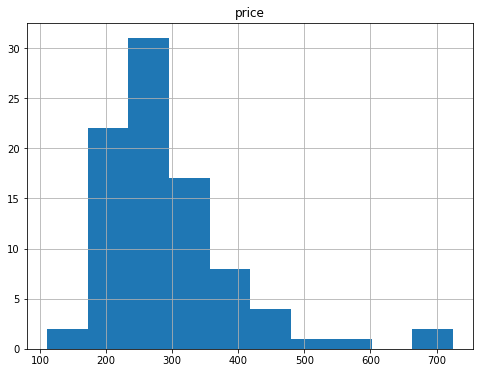

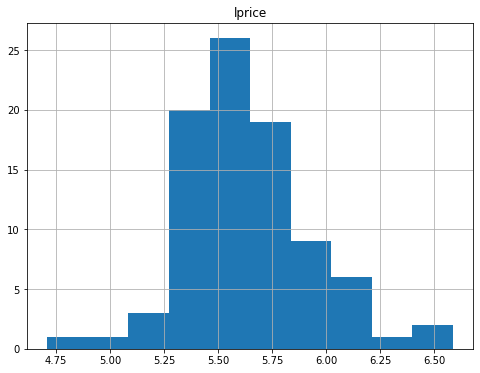

In [36]:
# 对数化对正态化的作用
## 以hprice1的price为例
### 未经对数化的直方图
hprice1.hist(column='price',figsize=(8,6))

### 对数化后的直方图
hprice1.hist(column='lprice',figsize=(8,6))

显然，对数化后的数据分布更接近正态分布！

### 4.2.2 二次项

老样子，一个例子讲明白二次项的作用！

**· Example10.** 直觉上看，职场里资历越老的人工资水平就越高，于是我们想知道某公司内员工工资水平与单位工作年限之前的关系。很自然地，我们会把模型简单地假设为
$$
wage=\beta _0+\beta _1exper+u
$$

但是，这个模型有一个暗含的前提：随着工作年限的提升，每年平均工资上升的幅度都相同。但现实中万恶的资本家不会那么便宜我们的，经验告诉我们，随着工作年限的上升，工资提升会逐渐变缓。也就是说，**工作年限**对工资水平的影响可能不是线性的，而是有一个'弧度”。如何让模型具备这个'弧度”呢？最简单也是最直观的方法就是，**在原模型的基础上**加入二次项
$$
wage=\beta _0+\beta _1exper+\beta _2exper^2+u
$$
假设经过OLS估计后，模型为
$$
\widehat{\text { wage }}=3.73+0.298 \text { exper }-0.006 \text { exper }^{2}
$$
第一年工资增加0.298单位，第二年增加0.286单位，第十年只能增加0.178单位，二次项验证了我们的猜想。

总结：如果我们在回归建模前认为某个自变量对因变量的影响不是线性的，可以尝试加入二次项，并观察二次项的显著性。如果显著，就说明两者关系确实为非线性的。

### 4.2.3 交互项

我们在定性变量章节介绍了定性变量之间以及定性与定量变量之间交互项的理解与意义，在这一小节我们介绍定量变量之间的交互项的理解。

定量变量间交互项的意义和之前的一样，若某一个变量对因变量的效应依赖于另一个自变量，则我们可以在模型中加入交互项。

**· Example11.** 我们用出勤百分比atndrte，读大学前的GPA、ACT来解释一批学生期末考试标准化的成绩。有人认为对于过去成绩不同的学生，出勤率可能具有不同的影响，于是我们在模型中加入两者的交互项
$$
\,\,\mathrm{stndfnl} =\beta _0+\beta _1\,\,\mathrm{atndrte} +\beta _2\,\,\mathrm{priGP} A+\beta _3ACT+\beta _4priGPA^2+\beta _5ACT^2+\beta _6priGPA\cdot \,\,\mathrm{atndrte} +u
\\
$$
在这里我们想提醒一下大家，在没有学习交互项、二次项的时候，我们会说自变量$x_i$的系数$\beta_i$是其对因变量$y$的偏效应，这是因为在全为一次项的模型中，$\frac{\Delta y}{\Delta x_i}$就等于系数$\beta_i$。而加入了交互项、二次项后，我们对存在交互项、二次项的自变量的系数解释就不会那么简单了。我们更关注问题的本质——$x_i$对因变量$y$的偏效应是多少，对于本例而言，出勤率对成绩的偏效应如下所示
$$
\frac{\Delta \text { stndfnl }}{\Delta a t n d r t e}=\beta_{1}+\beta_{6} \text { priGPA }
$$
可见，$priGPA$在不同取值下，出勤率对成绩的影响是不一样的。其实有了这个公式，我们可以计算出$priGPA$在不同取值下，出勤率对成绩偏效应的具体值，这一任务非常简单。但是涉及交互问题的假设检验就相对复杂一点，也非常有趣。通常来说，这类问题假设检验有如下两个

1. 出勤率对成绩的影响是否显著？对于这一问题，假设需要设置成这样
$$
H_0: \beta _1=\beta _6=0 \leftrightarrow \,\,H_1: H_0\text{不成立}
$$
很明显，我们用F检验即可。

In [37]:
attend=pd.read_stata('data/attend.dta')
attend.head()

,attend,termgpa,priGPA,ACT,final,atndrte,hwrte,frosh,soph,skipped,stndfnl
0,27.0,3.19,2.64,23.0,28.0,84.375,100.0,0.0,1.0,5.0,0.472689
1,22.0,2.73,3.52,25.0,26.0,68.750,87.5,0.0,0.0,10.0,0.052521
2,30.0,3.00,2.46,24.0,30.0,93.750,87.5,0.0,0.0,2.0,0.892857
3,31.0,2.04,2.61,20.0,27.0,96.875,100.0,0.0,1.0,1.0,0.262605
4,32.0,3.68,3.32,23.0,34.0,100.000,100.0,0.0,1.0,0.0,1.733193


In [38]:
# 构建有约束、无约束模型
attend_lm_ur=sm.formula.ols('stndfnl~atndrte+priGPA+ACT+I(priGPA**2)+I(ACT**2)+I(priGPA*atndrte)',data=attend).fit()
attend_lm_r=sm.formula.ols('stndfnl~priGPA+ACT+I(priGPA**2)+I(ACT**2)',data=attend).fit()

# F检验
display(anova_lm(attend_lm_r,attend_lm_ur))
print('结果显著，可以拒绝原假设')

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,675.0,519.343813,0.0,NaN,NaN,NaN
1,673.0,512.762440,2.0,6.581373,4.319021,0.013684


结果显著，可以拒绝原假设


2. 当$priGPA$为一个具体的值时，出勤率在这个值下对对成绩的影响是否显著？

这个问题非常有趣，要回答这个问题，我们需要对原模型做一些小改变。假设我们想验证$priGPA=2.59$时出勤率的显著性，我们需要将原来的$atndrte$修改为$atndrte-2.59$。模型也将变成
$$
\,\,\mathrm{stndfnl}=\beta _0+\beta _1\,\,\mathrm{atndrte}+\beta _2\,\left( GPA-2.59 \right) +\beta _3ACT+\beta _4\left( priGPA-2.59 \right) ^2+\beta _5ACT^2+\beta _6\left( priGPA-2.59 \right) \cdot \,\,\mathrm{atndrte}+u
$$
我们根据这个模型求偏导会有
$$
\frac{\Delta \text { stndfnl }}{\Delta a t n d r t e}=\beta_{1}+\beta_{6} \text { (priGPA-2.59) }
$$
当$atndrte=2.59$时，偏效应正好就是$\beta_1$！我们只需要查看这个模型的$\beta_1$显著性就可以回答这一假设检验问题了。

In [39]:
attend['priGPA2']=attend['priGPA']-2.59
attend_lm2=sm.formula.ols('stndfnl~atndrte+priGPA2+ACT+I(priGPA2**2)+I(ACT**2)+I(priGPA2*atndrte)',data=attend).fit()
print(attend_lm2.summary())
print('结果显著，可以拒绝原假设')

                            OLS Regression Results                            
Dep. Variable:                stndfnl   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     33.25
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           3.49e-35
Time:                        16:29:17   Log-Likelihood:                -868.90
No. Observations:                 680   AIC:                             1752.
Df Residuals:                     673   BIC:                             1783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1827 

# 5. CLM假设误差分析

结束了前四章的学习，大家基本上掌握了回归分析中比较重要的知识了。我们简单回顾一下前面所学内容：

1. 第一章，我们学习了回归的基本思想，并介绍了本课程中最重要、最常用的模型——多元线性回归模型。
2. 第二章，我们介绍了多元线性回归模型的基本六大假设——CLM假设，OLS最小二乘估计法并学习了在这套假设下的性质。需要注意的是，后面两章的内容均建立这些OLS性质上，我们需要时刻牢记这一点。
3. 第三章，我们学习了回归分析中最重要的分析任务之一——模型的统计推断，介绍了回归分析中各种类型的假设检验。
4. 第四章，我们对线性模型进行了拓展，将回归元从定量变量一次项拓展至定性变量、对数项、二次项、交互项，使模型蕴含的信息更丰富。

然而，以上内容均建立在模型严格满足CLM假设的前提下，一旦模型违背了CLM假设中的某一条假设，模型估计的精度、假设检验的可信度将受到影响。那么，违反某条CLM假设具体会给模型估计带来多大的影响呢？这就是本节需要讨论的内容。

## 5.1 OLS估计另一种更为常用的求解方法

我们在前面的章节中给出了OLS估计系数求解的矩阵表达式
$$
\hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$
并给出了每个估计系数$\hat{\beta_j}$估计标准误的矩阵表达式
$$
\operatorname{se}\left(\hat{\beta}_{j}\right)=\hat{\sigma} \sqrt{\left(X^{\prime} X\right)_{j+1, j+1}^{-1}}
$$
矩阵表达式的一大好处就是方便求解，直接矩阵运算就完事了。但是这并不利于我们观察它们的'构成”——如果我想知道系数的估计标准误受什么因素影响，并从此获知降低误差的方法，那么面对上面这个只有设计阵$X$的公式，我们只能阿巴阿巴。

好在OLS估计确实有另一种求法，且这种求法得来的公式可以满足我们这一需求，接下来就让我们简单介绍一下这种求法，并用它来总结出系数估计方差的影响因素吧！

### 5.1.1 解法步骤

该部分仅作了解即可。

我们以求回归模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
中$\beta_1$为例，大体上可分为两步

**· step 1**，以$x_1$做因变量，对其他自变量做回归
$$
x_{1}=\alpha_{0}+\alpha_{2} x_{2}+\cdots+\alpha_{k} x_{k}+r_{1}
$$
记残差为$\hat{r}_{1}=\left(\hat{r}_{11}, \hat{r}_{21}, \cdots, \hat{r}_{n 1}\right)^{\prime}$

**· step 2**，$y$对残差$\hat{r}_{1}$做过原点（无截距）的回归
$$
y=\gamma \hat{r}_{1}+u
$$
可以证明，$\beta_1$的估计就是$\hat{y}$
$$
\hat{\gamma}=\hat{\beta}_1=\frac{\sum_{i=1}^n{\hat{r}_{i1}}y_i}{\sum_{i=1}^n{\hat{r}_{i1}^{2}}}
$$
我们仔细品味一下$\beta_1$的求解过程，会发现它非常符合我们对回归模型系数的理解——在第一步的自变量回归中，残差$\hat{r}_{1}$相当于是在$x_1$中排除了$x_2$,……,$x_n$影响后的剩余部分，因此$\hat{\beta}_1$相当于在度量排除了其余自变量影响后，$x_1$对$y$的影响。而我们回想一下之前我们对$\beta_1$的解释有一个重要的前置语：'在其他自变量不变的前提下”，这恰恰就是排除其他变量的影响的含义。

我们用python实操一波，看看这种求解方法的结果和之前的求解方法是否一致。

In [40]:
# 以gpa_lm2的ACT系数为例

# 常规解法的结果
print('常规解法的结果:')
display(c2)
print('-------------------------------------------')

# 新求解法
gpa_lm2_pre=sm.formula.ols('ACT~hsGPA',data=gpa1).fit()
gpa1['resid']=gpa_lm2_pre.resid
gpa_lm2_pre2=sm.formula.ols('colGPA~resid-1',data=gpa1).fit()
print('新解法的效果')
print(gpa_lm2_pre2.params[0])

常规解法的结果:


,params
const,1.286328
ACT,0.009426
hsGPA,0.453456


-------------------------------------------
新解法的效果
0.009426012260471961


可见，两种解法是完全等价的。

### 5.1.2 估计系数的方差构成与多重共线性

在MLR.1~MLR.5下，$\operatorname{Var}\left(\hat{\beta}_{1}\right)$可计算为
$$
\operatorname{Var}\left(\hat{\beta}_{1}\right)=\frac{\sigma^{2}}{\sum_{i=1}^{n} \hat{r}_{i 1}^{2}}=\frac{\sigma^{2}}{S S T_{1}\left(1-R_{1}^{2}\right)}
$$
其中，$S S T_{1}=\sum_{i=1}^{n}\left(x_{i 1}-\bar{x}_{1}\right)^{2}$为$x_1$变量本身的完全平方和，$R_{1}^{2}$是$x_1$对其他解释变量所作回归的拟合优度判决系数，$\sigma^{2}$则是之前提及的随机误差的方差。至此，回归系数估计方差的构成就结构完毕了，它依赖于三个因素：

**· 误差方差$\sigma^{2}$**，随机误差的方差可以理解为数据集的噪声信息，噪声信息越多，估计的不确定性就越大，方差就越大，这点很顺理成章！但是一般来说，对于给定的数据集，误差方差也是随之确定的，我们一般不会在这个因素上下文章。

**· 自变量$x_1$本身的总变异$SST_1$**，自变量总变异越大，表明自变量散步程度越高，估计越牢靠。关于这个指标，我们会发现：对于一个分析任务来说，样本量越大，总变异也就越大，进而估计方差会变小，这告诉我们更多的随机样本有利于提高估计的精度！

**· 自变量间的线性关联程度$R_{1}^{2}$**，$R_{1}^{2}$约接近1，$x_1$与其他自变量之间的线性关系就越强烈，估计方差也越大。这种近似的共线性关系被称为**多重共线性(multicolinearity)**，它不同于完全共线性（事实上$R_{1}^{2}=1$时就是完全共线性），这种现象在数据分析中普遍存在，只是程度有所区别。那么如何衡量共线性的严重程度呢？我们一般用方差膨胀因子(VIF,Variance Inflation Factor)来评判
$$
VIF_{x1}=\frac{1}{1-R_{1}^{2}}
$$
若$VIR>10$，意味着共线性很严重，需要采取措施降低共线性。

现在的问题是，如何降低多重共线性呢？一种方法是使变量之间尽可能的不相关，关于这点我们可以查看变量之间的皮尔逊相关系数，如果某两个变量之间的相关系数非常高，我们就需要考虑不把它们同时放入模型中；第二种方法是减少自变量的个数。一般而言，模型中自变量个数越多，R方会越大。而$R_{1}^{2}$正是$x_1$对其他自变量做回归的判决系数，显然，其他自变量越多，$R_{1}^{2}$就越大。这个方法告诉我们，**模型的自变量绝非越多越好**，有关这个问题的讨论，我们会在下一节做深入探讨。

最后，我们总结一下降低估计方差，提高估计精度的方法

1. 采取更合理的数据采样方法，降低数据噪声。
2. 增大数据样本量
3. 根据线性相关程度筛选纳入模型的变量，且切忌纳入过多变量。

## 5.2 模型误设的误差分析——违反MLR.1的后果是什么

### 5.2.1 如何理解模型误设

在MLR.1中，我们假设自己设置的模型是'正确的”，即对
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
的假设上，我们正确地纳入了所有关键的自变量，且没有纳入多余的自变量。而多纳入一个无关的变量，以及少纳入一个关键的变量，都能算是违反MLR.1，我们可以看看误设模型对模型中变量系数的估计会有怎样子的影响。

### 5.2.2 模型误设的后果

**· 遗漏相关变量**

假设真模型为
$$
y \sim x_{1}+x_{2}+\cdots+x_{k-1}+x_{k}
$$
但我们实际拟合的模型却是
$$
y \sim x_{1}+x_{2}+\cdots+x_{k-1}
$$
假设真模型的系数估计记为$\hat{\beta}_{i}$，实际模型的系数估计为$\tilde{\beta}_{i}$，那么有
$$
\tilde{\beta}_{1}=\hat{\beta}_{1}+\hat{\beta}_{k} \tilde{\delta}_{1}
$$
其中，$\tilde{\delta}_{1}$是遗漏变量对其余变量的辅助回归$x_{k} \sim x_{1}+x_{2}+\cdots+x_{k-1}$中$x_1$对应的回归系数。我们观察一下$\tilde{\beta}_{1}$的无偏性情况
$$
E\left(\tilde{\beta}_{1} \mid x\right)=\beta_{1}+\beta_{k} \tilde{\delta}_{1}
$$
发现，原本正确模型假设下的无偏性$E\left( \hat{\beta}_1 \right) =\beta _1$，因漏设相关变量$x_k$导致多了偏差$\beta_{k} \tilde{\delta}_{1}$。

因此，对于遗漏变量$x_k$，除非$\beta_k=0$（即$x_k$对$y$完全不影响），或者$\tilde{\delta}_{1}=0$（遗漏变量$x_k$与待分析自变量$x_1$不相关），否则遗漏变量会对我们实际估计模型的系数估计产生有偏影响，即我们的系数估计不再是平均意义上的准确！

**· 多纳入一个无关变量**

假设真模型为
$$
y \sim x_{1}+x_{2}+\cdots+x_{k-1}
$$
但实际拟合的模型是
$$
y \sim x_{1}+x_{2}+\cdots+x_{k-1}+x_{k}
$$
且：$x_k$与其余自变量$x_i$存在相关性，但与因变量$y$不存在相关性（即无法对因变量变异做出解释），此时，我们实际拟合的模型相当于是
$$
y=\beta _0+\beta _1x_1+\cdots +\beta _{k-1}x_{k-1}+0x_k+u
$$
这种过度设定**其实并不违反MLR.1-MLR.4中的任意一条**，因为就算将这个无关变量纳入模型，最终拟合出来的变量对应系数也会是0。因此，纳入无关变量这种情况对于建立在前四个假设上的OLS无偏性是没有影响的！即依然有
$$
E\left( \widetilde{\beta _i} \right) =\beta _i
$$
但是只要$x_k$与其它自变量存在共线性，将其纳入会使其他系数的估计方差变大。以$x_1$的系数为例，假设纳入$x_k$前它的方差是
$$
\mathrm{Var}\left( \hat{\beta}_1 \right) =\frac{\sigma ^2}{SST_1\left( 1-R_{1,k-1}^{2} \right)}
$$
而纳入$x_k$后它的方差就变成了
$$
\mathrm{Var}\left( \tilde{\beta}_1 \right) =\frac{\sigma ^2}{SST_1\left( 1-R_{1,k}^{2} \right)}
$$
由于而多自变量的模型R方总是大于少自变量模型的R方，即
$$
R_{1,k-1}^{2}<R_{1,k}^{2}
$$
于是最终有
$$
\mathrm{Var}\left( \hat{\beta}_1 \right) <\mathrm{Var}\left( \tilde{\beta}_1 \right) 
$$
因此，对于增加一个**对解释因变量无益**的自变量，一旦这个无益自变量与其它自变量存在共线性，则会增大其他估计系数的估计方差！

### 5.2.3 变量选择的方法论

我们总结一下以上的内容：

1. 减少模型中的变量，可能会导致模型其他系数的估计有偏，但是会使系数估计的方差减少，即：增大偏差、减小方差
2. 增加模型中的变量，不会导致模型系数估计有偏，但是会使系数估计的方差增大，即：减小偏差、增大方差

而在实际情况中，我们不可能得知一个真正正确的模型，而是在摸索中慢慢找到适合纳入模型的变量。通常来说，有两种考量纳入变量的方法论：

1. 从少数变量开始，一步步向模型纳入我们认为重要的变量，并通过t检验显著性来判断是否纳入该变量；如果我们认为变量存在二次项效应与交互项效应，可以将其纳入模型并通过联合F检验判断其显著性，直到模型的解释度达到一个较高的水平。
2. 从多数变量开始，一步步将不显著的变量剔除出模型。

这两种方法该用哪一种，视具体情况而定。假若数据集的变量非常多，那我倾向于使用第一种方法，一步步将我们认为重要的变量纳入模型；若变量不多，则第二种方法可以考虑。

对于变量的选择，还有一些自动化的方法，如向前逐步选择、向后逐步选择等等。但我个人认为，这些自动的变量选择方法更关注模型的预测能力，而不注重变量本身对模型的意义，它们更适用于机器学习的预测任务，而不适用于回归分析，因为回归分析中最重要的意义就是'解释与推断”。

## 5.3 模型不满足正态性的分析——违反MLR.6的后果是什么

**提前公布答案：在样本量较大的情况下，不满足MLR.6不会有什么不好的后果！**

### 5.3.1 如何理解与观测正态性假设

我们先回顾一下MLR.6：该假设假定随机误差$u$在任何自变量$x$已知的条件下服从正态分布
$$
u \mid x \sim N\left(0, \sigma^{2}\right)
$$
即每个样本的误差$u_1,u_2,...,u_n$都是来源于一个正态总体。然而，随机误差在数据集中是根本观测不到的，而由于在$x$已知的条件下，$u$的正态性等价于$y$的正态性，因此我们只需要查看样本因变量$y$的分布图就可以大致判断正态性了。

然而，因变量$y$不为正态分布的情况是非常常见的，以下面的$narr86$为例，它统计了青年人在某一特定年份被拘捕的次数。很明显，绝大部分青年人都没有被拘捕过，因此该变量的分布是一个严重的偏态分布，不可能为正态分布。


0.0     1970
1.0      559
2.0      121
3.0       42
5.0       13
4.0       12
6.0        4
7.0        1
10.0       1
9.0        1
12.0       1
Name: narr86, dtype: int64


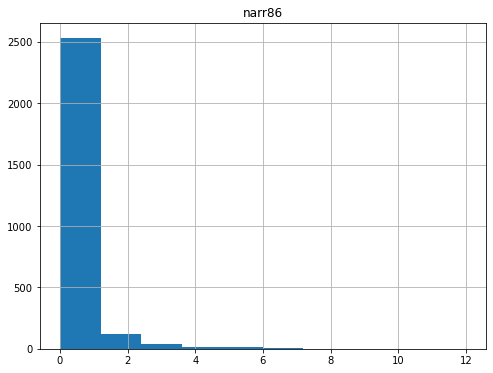

In [41]:
# 频数直方图
crime1=pd.read_stata('data/crime1.dta')
crime1.hist(column='narr86',figsize=(8,6))
print(crime1.narr86.value_counts())

那么，如果将其作为因变量$y$构建模型，会发生什么后果呢？

### 5.3.2 违背正态性假设的后果

我们知道，在MLR.1-MLR.5下，OLS估计具有最优线性无偏估计的性质，这一性质不需要满足正态性假设MLR.6，因此**违背正态性假设不会影响OLS系数估计的准确性与稳定性**。

但是我们在进行假设检验的时候，基于t统计量与F统计量的推断是以满足MLR.6为前提的，这是否意味着对于narr86这种因变量而言，我们无法对其进行t检验与F检验呢？幸运的是，回答是否定的。得益于**中心极限定理**，我们有下述定理成立

**· 定理：** 在MLR.1-MLR.5假定下，OLS估计系数的抽样分布满足
$$
\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \Rightarrow N(0,1)
$$
即，OLS的系数估计满足渐进正态性，这意味着在大样本容量下，OLS估计系数是近似正态分布的。

接下来的问题是，大样本下OLS估计是渐进正态分布的，按理来说应当使用标准正态分布作参考而不是用t分布作参考。但从实证角度来说，使用t分布进行大样本假设检验也是合理的，即以下写法是合理的
$$
\frac{\hat{\beta}_j-\beta _j}{\mathrm{se}\left( \hat{\beta}_j \right)}\Rightarrow t_{n-k-1}
$$
这是因为，当t分布自由度df达30以上时，就已经接近为正态分布了，而大样本下样本容量$n$的大数值将让自由度$n-k-1$也达到一个很大的数值，因此使用t分布进行检验实际上是没问题的！

最后的问题是，样本容量究竟要有多大才算是大样本呢？这没有一个固定的答案，部分学者认为大于等于30就可以了，当然样本量越多越好这是毋庸置疑的。

## 5.4 异方差的分析——违反MLR.5的后果是什么

### 5.4.1 如何理解与观测异方差性

我们先回顾一下同方差假设MLR.5：随机误差$u$的条件方差恒为一个常数，即
$$
\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
这个假设还可以拓展成因变量$y$的同方差性
$$
\operatorname{Var}\left(y \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
即，对于给定样本的$y_1,y_2,…,y_n$，**在每一个自变量$x_j$测度下**，它们的方差都应当是恒定的。这句话可以理解成，因变量/随机误差的方差在每一个自变量$x_j$下都不随自变量的变化而变化；而只要其在某一个自变量$x_j$下的方差是不稳定的，则同方差假设就不成立！

这些文字看起来有点抽象，我们依旧一个例子向大家展示两种异方差的观测方法。

**· Example12.** 我们研究住房价格price的影响因素，并初步确定模型为
$$
\text { price }=\beta_{0}+\beta_{1} \text { lotsize }+\beta_{2} \text { sqrft }+\beta_{3} b d r m s+u
$$
即，我们纳入了三个自变量：lotsize,sqrft,bdrms。要想观测样本是否存在异方差性，第一种方法就是直接查看因变量$y$分别在三个自变量下的散点分布图，看看因变量在自变量值变化时的散布特征是否不变。

Text(0, 0.5, 'price')

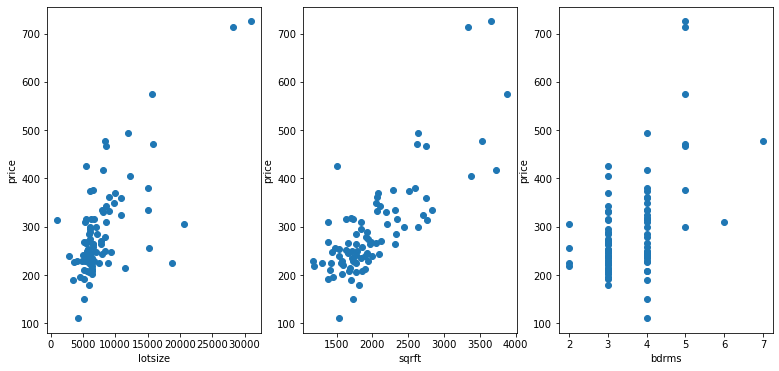

In [42]:
# 使用数据集hprice1，前面已经加载过
fig=plt.figure(figsize=(13,6))
ax1=fig.add_subplot(1,3,1)
hprice2=hprice1[hprice1['lotsize']<80000] #去掉了一个极端点，方便观察
plt.scatter(hprice2.lotsize,hprice2.price,axes=ax1)
ax1.set_xlabel('lotsize')
ax1.set_ylabel('price')

ax2=fig.add_subplot(1,3,2)
plt.scatter(hprice1.sqrft,hprice1.price,axes=ax2)
ax2.set_xlabel('sqrft')
ax2.set_ylabel('price')

ax3=fig.add_subplot(1,3,3)
plt.scatter(hprice1.bdrms,hprice1.price,axes=ax3)
ax3.set_xlabel('bdrms')
ax3.set_ylabel('price')

我们发现，lotsize与sqrft的散布情况相对稳定，异方差的情况并不明显；而bdrms就不一样了，当$bdrms=3$时，因变量值分布呈现出往较小值偏移的特征，表现为上面稀疏，下面稠密。而$bdrms=4$时，因变量值的分布则相对对称，这说明price在bdrms上存在异方差的现象！

另一种观测异方差的方法是先进行OLS拟合，并以0为参考基准，观测残差在三个自变量上的表现。

Text(0, 0.5, 'resid')

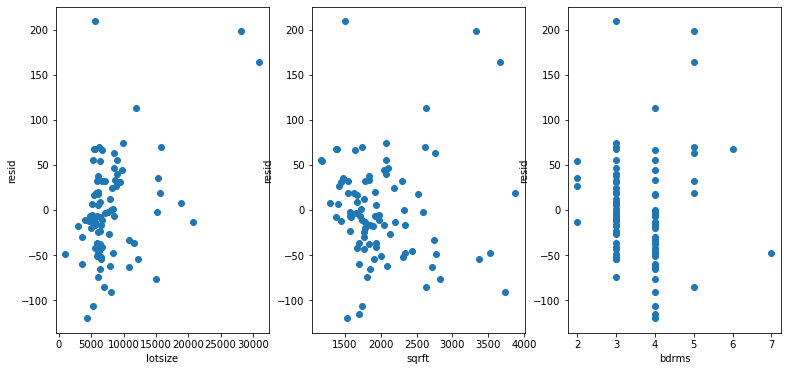

In [43]:
hprice1_lm=sm.formula.ols('price~lotsize+sqrft+bdrms',data=hprice1).fit()
hprice1['resid']=hprice1_lm.resid

# 画图
fig=plt.figure(figsize=(13,6))
ax1=fig.add_subplot(1,3,1)
hprice3=hprice1[hprice1['lotsize']<80000] #去掉了一个极端点，方便观察
plt.scatter(hprice3.lotsize,hprice3.resid,axes=ax1)
ax1.set_xlabel('lotsize')
ax1.set_ylabel('resid')

ax2=fig.add_subplot(1,3,2)
plt.scatter(hprice1.sqrft,hprice1.resid,axes=ax2)
ax2.set_xlabel('sqrft')
ax2.set_ylabel('resid')

ax3=fig.add_subplot(1,3,3)
plt.scatter(hprice1.bdrms,hprice1.resid,axes=ax3)
ax3.set_xlabel('bdrms')
ax3.set_ylabel('resid')


用残差观测的结果得出的结论也是相似的。

### 5.4.2 违背同方差假设的后果

模型形式误设（导致违背MLR.1）以及随机误差的非正态性对模型的影响并不明显，而违反同方差假设的后果就相对严重了:

1. 首先由于MLR.1-MLR.4仍然成立，因此系数估计的无偏性依然成立。
2. 异方差下，OLS估计不再是**最优**线性无偏估计。
3. 异方差下，估计系数的方差计算不再准确，从而影响到标准误的计算，进而影响到t检验与F检验的有效性。

我们注意第三点，并不是说在异方差下我们原先的t检验统计量不再服从t分布了，而是因为t检验统计量中含有标准误，而标准误如果在异方差条件下按照同方差的方式计算，会导致t检验统计量不准确，而如果我们可以将之纠正，我们依旧可以进行t检验与F检验！

有关异方差的解决方法，我们将在下一章节介绍。

# 6. 异方差下的回归分析

我们在上一小节已经知道了异方差导致的两个后果：OLS不再最优、t检验与F检验不再稳健。那么在这一节我们就要针对这两个问题提出解决的方法。

在这一章节我们将学习：

1. 在异方差下如何重新估计标准差/标准误，并进行稳健的推断（假设检验）
2. 如何用假设检验检测数据的异方差性
3. 如何修正OLS估计方法达到最优（广义OLS法-GLS）

我们要分清1与3的区别：方法1仍然建立在OLS估计上，只不过采取了一些措施使得假设检验变得稳健；方法3则是将OLS改进为一种新的估计方法GLS。

## 6.1 异方差稳健的t检验与F检验

所谓稳健方法，就是这种方法不论是在异方差还是同方差下都可以进行使用。

### 6.1.1 重新估计方差

我们回顾一下在同方差假设下$\hat{\beta_j}$的方差估计：
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)=\frac{\sigma^{2}}{\sum_{i=j}^{n} \hat{r}_{i j}^{2}}=\frac{\sigma^{2}}{S S T_{j}\left(j-R_{j}^{2}\right)}
$$
事实上，这个方差估计有一个更广义的表达
$$
\operatorname{Var}\left(\hat{\beta}_{j}\right)=\frac{\sum \hat{r}_{i j}^{2} \sigma_{i}^{2}}{R S S_{j}^{2}}
$$
在同方差假设下，由于$\sigma_{i}=\sigma$，才有了上面化简了的表达式。然而，在异方差下，我们不能简单地认为$\sigma_{i}=\sigma$，而是对于每一个$\sigma_{i}$都要有一个对应的估计$\hat{\sigma _i}$。那么，对于$\hat{\sigma _i}$，我们要怎么估计它呢？答案是，直接用残差$\hat{u_i}$代替，即$\hat{\sigma _i}=\hat{u_i}$，系数重新估计的方差就变为了
$$
\widehat{\operatorname{Var}\left(\hat{\beta}_{j}\right)}=\frac{\sum \hat{r}_{i j}^{2} \hat{u}_{i}^{2}}{R S S_{j}^{2}}
$$
至此，我们就可以利用新的估计方差进行稳健t检验与F检验了。

### 6.1.2 稳健t检验

对于单参数检验问题，我们使用稳健t检验。

先看单参数检验问题
$$
H_{0}: \beta_{j}=\beta_{j0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}
$$
定义t统计量
$$
t=\frac{\hat{\beta}_j-\beta _{j0}}{\mathrm{se}\left( \hat{\beta}_j \right)}\approx N\left( 0,1 \right) 
$$
注意，此时t统计量不再服从t分布，而是服从标准正态分布！（因此需要用到正态分布的p值和分位点，除此以外检验的原理完全不变）。

In [44]:
# 以前面的price1_lm为例
# hprice1_lm=sm.formula.ols('price~lotsize+sqrft+bdrms',data=hprice1).fit()
print('同方差假设下模型的方差估计与推断结果：')
print(hprice1_lm.summary().tables[1])
print('-------------------------------------------')
hprice1_lm_1=sm.formula.ols('price~lotsize+sqrft+bdrms',data=hprice1).fit(cov_type='HC0', use_t=False)
# use_t：稳健t检验是否使用t分布进行推断，False表示拒绝使用t分布，改用标准正态分布
print('异方差假设下模型的稳健方差估计与推断结果：')
print(hprice1_lm_1.summary().tables[1])

同方差假设下模型的方差估计与推断结果：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770
-------------------------------------------
异方差假设下模型的稳健方差估计与推断结果：
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     36.284     -0.600      0.549     -92.886      49.346
lotsize        0.0021      0.001      1.691      0.091      -0.000       0.004
sqrft          0.1228      0.017      7.090      0.000       0.089       0.157
bdrms         13.8525      8.284      1.672  

以上结果展示了异方差稳健t检验的结果与普通t检验的结果确实会有不同：lotsize在普通t检验下是显著的，但在稳健t检验中是不显著的。

### 6.1.3 稳健F检验

对于多参数的联合检验，我们使用稳健F检验。

稳健F检验的问题设置与原来的F检验一样，且它们的F检验统计量也完全一样，即
$$
F=\frac{\left(R S S_{r}-R S S_{u r}\right) / q}{R S S_{u r} /(n-k-1)}
$$
只不过，在稳健检验下，F统计量并不严格服从F分布，而是渐进服从自由度为$q$的卡方分布。

我们考虑下述模型
$$
cumgpa=\beta _0+\beta _1sat+\beta _2hsperc+\beta _3tothrs+\beta _4female+\beta _5black+\beta _6white+u
$$
并做假设检验
$$
H_0: \beta _5=\beta _6=0 \leftrightarrow \,\,H_1: H_0\text{不成立}
$$

In [45]:
# 载入数据
gpa3=pd.read_stata('data/gpa3.dta')
gpa3=gpa3[gpa3['term']==2]

In [46]:
# 直接训练无约束模型，并采用稳健估计训练
gpa3_lm=sm.formula.ols('cumgpa~sat+hsperc+tothrs+female+black+white',data=gpa3).fit(cov_type='HC0')

hypotheses='(black=0),(white=0)' # 另一种做联合检验的形式，直接将原假设写出来
gpa3_lm.wald_test(hypotheses,use_f=True,scale=False)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.74779698]]), p=0.47414427215551025, df_denom=359, df_num=2>

在上面的报告中，F值为0.74779698，p值为0.47414427215551025，显然，不能拒绝原假设。

## 6.2 异方差的诊断

尽管异方差稳健的t、F检验适用范围更广，但是如果数据不存在异方差，则传统OLS估计及其假设检验依然是最优的；此外，如果我们能确定存在异方差且可以估计出异方差的形式，那么我们可以获得比OLS估计更好的估计方法。而它们的前提都是我们可以准确地判断出数据是否存在异方差。

在前面的学习中，我们通过散点图的方法粗略地判断模型是否存在异方差，但是这样的判断方法过于主观，我们需要一种可靠客观的诊断方法。

异方差检验的种类非常多，有的检验只检验方差是否'恒定”，而不检验方差是否与自变量无关，即方差是某些自变量的函数$\sigma =\sigma \left( x \right)$。事实上，比起纯粹地知晓方差是否恒定，我们更关心后者，这是因为如果方差确实是某个自变量的函数，那么我们就可以采用广义OLS估计法（也就是GLS）进行更有效地估计。

关于检验方差是否与自变量无关的方法，最常用的便是BP异方差检验与White异方差检验。

### 6.2.1 BP异方差检验

**· 检验思想**

我们取原假设为：假定同方差假设正确，即
$$
\operatorname{Var}\left(u \mid x_{1}, \cdots, x_{k}\right)=\sigma^{2}
$$
由于MLR.2假设：$E\left(u \mid x_{1}, \cdots, x_{k}\right)=0$的成立，则同方差假设等价为
$$
E\left( u^2\mid x_1,\cdots ,x_k \right) =\sigma ^2
$$
这个假设说明的是$u^2$的条件均值应当为一个常数而不是一个与自变量$x_j$有关的函数。我们在前面提到过，回归的本质是条件均值建模，而这个假设刚好就是有关$u^2$条件均值的假设，于是我们可以**根据我们实际要检验的问题构建线性回归模型**，并将检验问题等价为模型系数的显著性检验。

BP检验的实质是检验异方差与所有自变量的一次项无关，这就等价于对一个以$u^2$为因变量，以$x_j$为自变量的线性回归模型
$$
u^{2}=\delta_{0}+\delta_{1} x_{1}+\delta_{2} x_{2}+\cdots+\delta_{k} x_{k}+v
$$
做全部变量系数的联合显著性检验，于是原假设变为
$$
\mathrm{H}_{0}: \delta_{1}=\delta_{2}=\cdots=\delta_{k}=0
$$
如果原假设被拒绝，就意味着存在一种与某自变量一次项相关的异方差。


**· BP检验的步骤（了解即可）**

1. 使用OLS法估计模型
$$
y \sim x_{1}+x_{2}+\cdots+x_{k-1}+x_{k}
$$
获得残差的平方$\hat{u}^2$

2. 使用OLS估计法估计模型
$$
\hat{u}^2 \sim x_{1}+x_{2}+\cdots+x_{k-1}+x_{k}
$$

3. 对所有变量系数做联合检验，可用F检验或大样本LM检验。

**· 用python实现BP检验**

依旧以前面的hprice1_lm为例，检验price~lotsize+sqrft+bdrms是否存在异方差。

In [47]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 直接输出
# hprice1_lm=sm.formula.ols('price~lotsize+sqrft+bdrms',data=hprice1).fit()
hprice1_lm_reg=sm.formula.ols('price~lotsize+sqrft+bdrms',data=hprice1) # 相比于hprice1_lm，他没有fit()
het_breuschpagan(hprice1_lm.resid,hprice1_lm_reg.exog)


(14.092385504350242,
 0.0027820595556890867,
 5.338919363241419,
 0.0020477444209360787)

In [48]:
# 定义一个输出bp检验的函数
def bp_test(res, X):
    result_bp_test = sm.stats.diagnostic.het_breuschpagan(res, X)
    bp_lm_statistic = result_bp_test[0]
    bp_lm_pval = result_bp_test[1]
    bp_F_statistic= result_bp_test[2]
    bp_F_pval = result_bp_test[3]
    bp_test_output=pd.Series(result_bp_test[0:4],index=['bp_lm_statistic','bp_lm_pval','bp_F_statistic','bp_F_pval'])    
    return bp_test_output

bp_test(hprice1_lm.resid,hprice1_lm_reg.exog)

bp_lm_statistic    14.092386
bp_lm_pval          0.002782
bp_F_statistic      5.338919
bp_F_pval           0.002048
dtype: float64

正如我们猜想的那样，确实存在异方差现象。

### 6.2.2 White异方差检验

BP检验考虑的是是否存在与变量的一次项相关的异方差，而White检验则增加了对所有变量二次项以及交互项的考察。

假若模型包含三个变量，BP检验所检验的模型是
$$
y\sim x_1+x_2+x_3
$$
而White检验所检验的模型是
$$
y\sim x_1+x_2+x_3+{x_1}^2+{x_2}^2+{x_3}^2+x_1x_2+x_1x_3+x_2x_3
$$
White检验虽然考虑的问题范围更广，但是由于回归元个数指数级增长，模型自由度相比于BP检验大大降低，对于自变量较多的情况，White检验可能并不如BP检验合适。

In [49]:
from statsmodels.stats.diagnostic import het_white

# White检验函数在python上的使用与bp检验完全一样

def white_test(res, X):
    result_bp_test = sm.stats.diagnostic.het_white(res, X)
    bp_lm_statistic = result_bp_test[0]
    bp_lm_pval = result_bp_test[1]
    bp_F_statistic= result_bp_test[2]
    bp_F_pval = result_bp_test[3]
    white_test_output=pd.Series(result_bp_test[0:4],index=['white_lm_statistic','white_lm_pval','white_F_statistic','white_F_pval'])    
    return white_test_output
    
white_test(hprice1_lm.resid,hprice1_lm_reg.exog)

white_lm_statistic    33.731658
white_lm_pval          0.000100
white_F_statistic      5.386953
white_F_pval           0.000010
dtype: float64

## 6.3 广义最小二乘法

回归存在异方差的另一种解决方法，就是根据异方差的具体形式使用广义的最小二乘法，对模型进行重新估计。对于这种解决方法，变量系数的估计也会发生变化，但是在异方差情形下，它比传统的OLS估计法更优！

我们提到'根据异方差的具体形式”，是指异方差可以用自变量的函数被表达出来。如果它能被我们找出来，我们就可以是加权最小二乘估计WLS；如果由于函数形式复杂而无法被判断出来，我们则使用可行的广义最小二乘估计FGLS。

接下来我们就来学习一下这两种方法吧！

### 6.3.1 加权最小二乘法

加权最小二乘法的原理非常简单。

假设异方差的形式除去一个常数外是已知的，即
$$
\operatorname{Var}(u \mid x)=\sigma^{2} h(x)
$$
那么如果我们在原模型两边同除以$\frac{1}{\sqrt{h\left( x \right)}}$，即
$$
\frac{y}{\sqrt{h\left( x \right)}}=\frac{\beta _{0}^{*}}{\sqrt{h\left( x \right)}}+\beta _{1}^{*}\frac{x_1}{\sqrt{h\left( x \right)}}+\cdots +\beta _{k}^{*}\frac{x_k}{\sqrt{h\left( x \right)}}+\frac{u}{\sqrt{h\left( x \right)}}
$$

并将带有$\frac{1}{\sqrt{h\left( x \right)}}$的自变量与随机误差视作是新的变量与随机误差，则问题就是同方差情形了，我们可以使用OLS估计。

我们使用一个简单的例子教会大家如何鉴别简单的异方差形式，并用statsmodels包中的wls函数进行wls估计。

**· Example13.** 我们想研究27家企业主管人数Y与工人人数X的关系。由于只有一个自变量，一开始我们可以考虑简单线性回归模型
$$
Y=\beta _0+\beta _1X+u
$$

In [50]:
# 载入数据集
data=pd.read_table('data/P176.txt')
data.head()

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


在判断异方差函数的形式上，可视化发挥着重要的作用。我们可以采用之前画散点图的办法，初步观测样本分布的情况。

bp_lm_statistic    16.028369
bp_lm_pval          0.000062
bp_F_statistic     36.522300
bp_F_pval           0.000003
dtype: float64
----------------------------------
white_lm_statistic    2.113448e+01
white_lm_pval         2.574574e-05
white_F_statistic     4.323809e+01
white_F_pval          1.104869e-08
dtype: float64


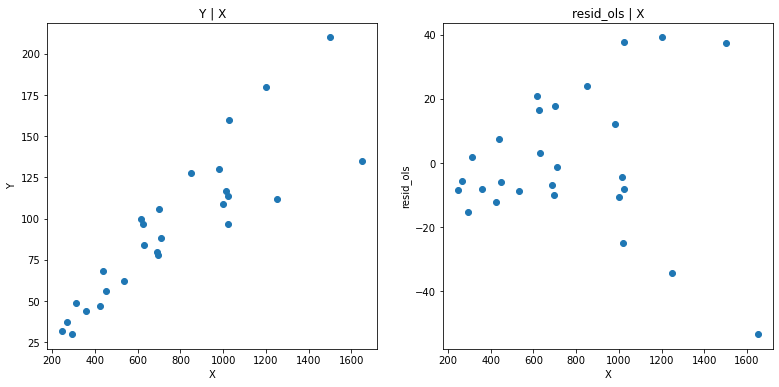

In [51]:
# 直接看Y与X的散点图
fig=plt.figure(figsize=(13,6))
ax1=fig.add_subplot(1,2,1)
plt.scatter(data.X,data.Y,axes=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Y | X')

# 查看ols估计的残差与X的散点图
data_lm=sm.formula.ols('Y~X',data=data).fit()
ax2=fig.add_subplot(1,2,2)
plt.scatter(data.X,data_lm.resid,axes=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('resid_ols')
ax2.set_title('resid_ols | X')

# 使用BP检验
data_lm_reg=sm.formula.ols('Y~X',data=data)
print(bp_test(data_lm.resid,data_lm_reg.exog))
print('----------------------------------')
# 使用White检验
data_lm_reg=sm.formula.ols('Y~X',data=data)
print(white_test(data_lm.resid,data_lm_reg.exog))

bp检验与White检验均表示，回归确实存在明显的异方差线性。且根据散点图，我们可以看到随着X的增大，样本的分布越来越分散，即方差越来越大。我们设想：方差可能与X的二次项成正比（一次项也有可能，言之有理即可），于是我们假定
$$
\operatorname{Var}(u \mid x)=\sigma^{2} x^{2}
$$

In [52]:
data_lm_wls=sm.formula.wls('Y~X',weights=1/data.X**2,data=data).fit()
# 注意：weights传入的是一个数组，不是一个'表达式”。如果方差函数为h(x)，则要传入1/h(x)的数组
print(data_lm.summary().tables[1])
print(data_lm_wls.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4481      9.562      1.511      0.143      -5.245      34.141
X              0.1054      0.011      9.303      0.000       0.082       0.129
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8033      4.570      0.832      0.413      -5.608      13.215
X              0.1210      0.009     13.445      0.000       0.102       0.140


我们对比一下两种估计方法的结果。加入我们对方差的假设是正确的，wls估计的系数标准误要小于ols估计的系数标准误，这说明wls在异方差下表现优于ols估计。

### 6.3.2 可行的广义最小二乘法

WLS估计法要求我们知晓$h(x)$的具体形式，而在大多数情况下，$h(x)$的形式是难以通过观察得出的，这个时候我们就需要使用一种方法估计出$h(x)$的形式，再使用wls估计法求解模型。这种方法又称为FGLS。

**· 如何估计$h(x)$**

FGLS将$h(x)$假设为
$$
h(x)=\exp \left(\delta_{0}+\delta_{1} x_{1}+\cdots+\delta_{k} x_{k}\right)
$$
则条件方差的表达式就有
$$
\mathrm{Var(}u\mid x)=E\left( u^2\mid x \right) =\sigma ^2\exp \left( \delta _0+\delta _1x_1+\cdots +\delta _kx_k \right) 
$$
进而有
$$
E\left( u^2\mid x \right) =\sigma ^2\exp \left( \delta _0+\delta _1x_1+\cdots +\delta _kx_k \right) \Rightarrow \log \left( u^2 \right) \sim x_1+\cdots +x_k
$$
也就是说，我们先用OLS估计求解一个以$\log \left(\hat{u}^{2}\right)$为因变量的线性回归模型，再将该模型进行指数化处理，便可以得到$h(x)$的估计形式了。

我们总结出以下步骤：

1. 做回归$y \sim x_{1}+\cdots x_{k}$，得到残差$\hat{u}$
2. 做回归$\log \left(\hat{u}^{2}\right) \sim x_{1}+\cdots+x_{k}$，得到拟合值$\hat{g}$
3. 计算函数$\hat{h}=\exp (\hat{g})$
4. 以$1/\hat{h}$做权重，用wls估计模型$y \sim x_{1}+\cdots x_{k}$


**· 用 python实现FGLS**

statsmodels没有直接进行FGLS的函数，我们需要手动估计$h(x)$。我们考虑下面的模型，用FGLS对其进行估计
$$
\text { cigs }=\beta_{0}+\beta_{1} \log (\text { income })+\beta_{2} \log (\text { cigpric })+\beta_{3} \text { educ }+\beta_{4} a g e+\beta_{5} \text { age }{ }^{2}+\beta_{6} \text { restaurn }+u
$$

In [53]:
smoke=pd.read_stata('data/smoke.dta')
smoke.head()

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric
0,16.0,60.506001,1.0,46.0,20000.0,0.0,0.0,9.903487,2116.0,4.102743
1,16.0,57.882999,1.0,40.0,30000.0,0.0,0.0,10.308950,1600.0,4.058424
2,12.0,57.664001,1.0,58.0,30000.0,3.0,0.0,10.308950,3364.0,4.054633
3,13.5,57.882999,1.0,30.0,20000.0,0.0,0.0,9.903487,900.0,4.058424
4,10.0,58.320000,1.0,17.0,20000.0,0.0,0.0,9.903487,289.0,4.065945


In [54]:
# 先进行ols估计
smoke_lm_ols=sm.formula.ols('cigs~log(income)+log(cigpric)+educ+age+I(age**2)+restaurn',data=smoke).fit()
smoke['resid']=smoke_lm_ols.resid

# 进行辅助回归
smoke_lm_log=sm.formula.ols('log(resid**2)~log(income)+log(cigpric)+educ+age+I(age**2)+restaurn',data=smoke).fit()
h_hat=np.exp(smoke_lm_log.fittedvalues)

# 进行wls检验
smoke_lm_wls=sm.formula.wls('cigs~log(income)+log(cigpric)+educ+age+I(age**2)+restaurn',weights=1/h_hat,data=smoke).fit()
print(smoke_lm_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.113
Model:                            WLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.06
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.32e-18
Time:                        16:29:22   Log-Likelihood:                -3207.8
No. Observations:                 807   AIC:                             6430.
Df Residuals:                     800   BIC:                             6462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6355     17.803      0.317   

# 作业

## 作业1：含二次项/对数项模型的讨论

我们想要探究婴儿出生的体重与何种因素相关，数据集为bwght2.dta，本次习题所使用的变量解释如下：

因变量：
<br>
· bwght：婴儿出生体重

自变量：
<br>
· npvis：母亲产前检查次数
<br>
· mage：母亲年龄

**使用python进行实操并回答以下问题**

（1）：使用OLS估计方程
$$
\log (b w g h t)=\beta_{0}+\beta_{1} n p v i s+\beta_{2} n p v i s^{2}+u
$$
输出报告表，并回答：自变量npvis的二次项是否显著？自变量npvis是否对因变量有显著影响？

（2）：基于（1）的方程，我们认为最大化log(bwght)的产前检查次数npvis约为22，其理论依据是什么？

（3）：按照这个模型的结果，在22次产前检查后婴儿出生体重会下降，这是为什么？你认为这有实际意义吗？这蕴含了一个含二次项变量模型的常见陷阱，请仔细思考！

（4）：在模型中加入母亲年龄变量及其二次形式。回答：保持npvis不变，母亲在什么生育年龄时，孩子出生体重最大？大于这个年龄时，孩子出生体重下降，这是否具有实际意义呢？请结合问题（3）思考这一问题。

（5）：（4）中的模型能否解释log(gwght)大部分变异？


In [88]:
bwght = pd.read_stata('data/bwght2.dta')
bwght.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'bwght', 'omaps',
       'fmaps', 'cigs', 'drink', 'lbw', 'vlbw', 'male', 'mwhte', 'mblck',
       'moth', 'fwhte', 'fblck', 'foth', 'lbwght', 'magesq', 'npvissq'],
      dtype='object')

In [89]:
bwght_lm = sm.formula.ols('np.log(bwght)~npvis+I(npvis**2)',data=bwght).fit()
bwght_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(bwght)   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     19.12
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           6.10e-09
Time:                        17:15:00   Log-Likelihood:                 310.56
No. Observations:                1764   AIC:                            -615.1
Df Residuals:                    1761   BIC:                            -598.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9579      0.027    291.364      0.000       7.904       8.011
npvis             0.0189      0.004      5.140      0.000       0.012       0.026
I(npvis ** 2)    -0.0004      0.000     -3.573      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     1169.962   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27576.021
Skew:                          -2.740   Prob(JB):                         0.00
Kurtosis:                      21.578   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 1 自变量npvis的二次项显著,npvis对因变量有显著影响。

22.0599987427116

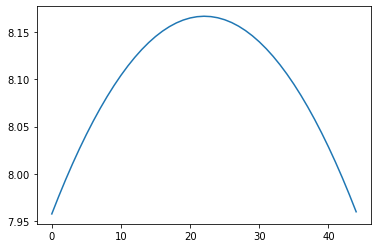

In [90]:
beta = bwght_lm.params
x = np.arange(45)
y = beta[0] + beta[1]*x + beta[2]*(x**2)
plt.plot(x,y) # 开口向下的抛物线
-beta[1]/(2*beta[2]) #22.05999713940457

##### 2 开口向下的抛物线，最大值取在 $x=-\frac{b}{2a}$，即$-\frac{beta[1]}{2*beta[2]}=22.06'$

##### 3 可能原因C（身体不好）同时导致了因素A（多次检查）和因素B（体重下降）。回归只揭露了相关性而非因果性。也可能是回归没有纳入足够多的关键变量，使得参数估计有偏'

In [93]:
bwght_lm2 = sm.formula.ols('lbwght~npvis+I(npvis**2)+mage+I(mage**2)', data=bwght).fit()
bwght_lm2.summary()
beta2 = bwght_lm2.params
-beta2['mage']/(2*beta2['I(mage ** 2)']) # 47.63982027517275

47.639820275258586

##### 4 从该回归模型看，47岁。结合问题（3）这可能有实际意义；因为母亲年龄越大，营养越少，导致婴儿体重下降符合逻辑。可以进一步检验'

In [94]:
bwght_lm.summary()
bwght_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lbwght   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.760
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           8.29e-08
Time:                        17:17:09   Log-Likelihood:                 310.97
No. Observations:                1764   AIC:                            -611.9
Df Residuals:                    1759   BIC:                            -584.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9344      0.038    208.265      0.000       7.860       8.009
npvis             0.0185      0.004      4.982      0.000       0.011       0.026
I(npvis ** 2)    -0.0004      0.000     -3.465      0.001      -0.001      -0.000
mage              0.0009      0.001      0.878      0.380      -0.001       0.003
I(mage ** 2)  -9.481e-06   6.66e-05     -0.142      0.887      -0.000       0.000
==============================================================================
Omnibus:                     1171.341   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27756.635
Skew:                          -2.743   Prob(JB):                         0.00
Kurtosis:                      21.643   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 5 不能。模型2的 R^2= 0.022，模型1的 R^2=0.021，未见显著提升；可见仍有大量关键信息未被纳入模型。

## 作业2：异方差模型的讨论

紧接着example13（主管人数与工人人数间关系的问题），我们对异方差问题进行更进一步的探讨。

**使用python进行实操并回答以下问题**

（1）：在假设方差形式为$\operatorname{Var}(u \mid x)=\sigma^{2} x^{2}$并进行wls估计后，比较wls估计与ols估计的残差图，回答：异方差消除了吗？

（2）：使用FGLS估计对该模型进行重新估计，观察残差图并回答：异方差消除了吗？

（3）：画出log(Y)与X的散点图，观察方差的状况，说说你的发现；根据散点图的情况，请大胆假设一个你认为正确的模型。

（4）：考虑新模型
$$
\log (Y)=\beta_{0}+\beta_{1} X+\beta_{2} X^2+u
$$
使用ols估计该模型，并画出残差散点图，说说你的发现

（5）：综合以上四个问题，谈谈你对纠正模型异方差的见解。


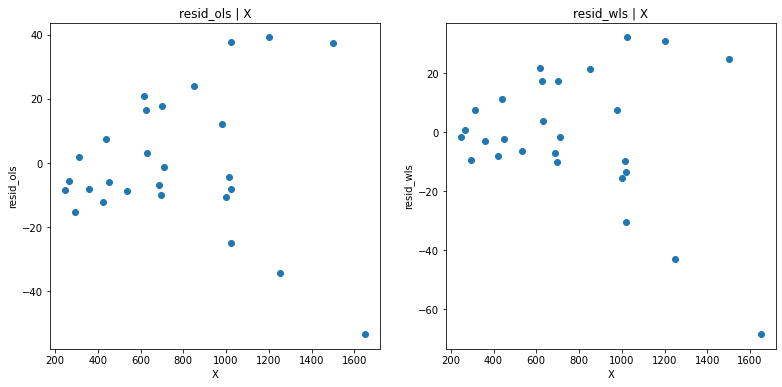

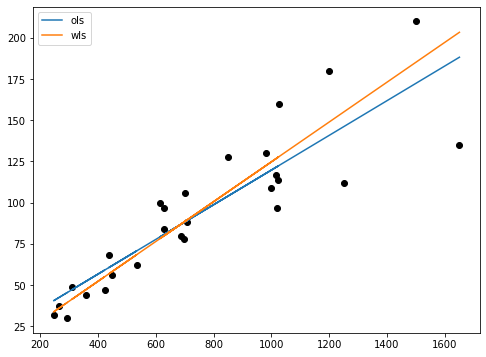

In [104]:
data_lm = sm.formula.ols('Y~X',data=data).fit()
data_lm_wls = sm.formula.wls('Y~X',weights=1/data.X**2,data=data).fit()

fig, ax = plt.subplots(1,2, figsize=(13,6))

ax_now = ax[0]
ax_now.scatter(data.X, data_lm.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_ols')
ax_now.set_title('resid_ols | X')

ax_now = ax[1]
ax_now.scatter(data.X, data_lm_wls.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_wls')
ax_now.set_title('resid_wls | X')

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data.X, data.Y, c='k')
ax.plot(data.X, data_lm.fittedvalues, label='ols')
ax.plot(data.X, data_lm_wls.fittedvalues, label='wls')
ax.legend()

plt.show()

##### 1 从图上看，异方差没有消除.

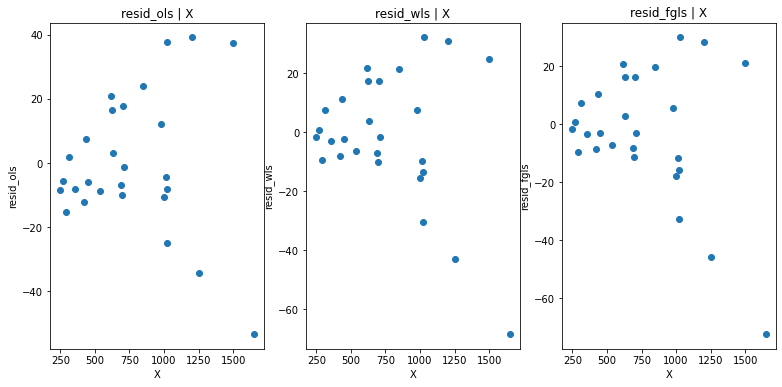

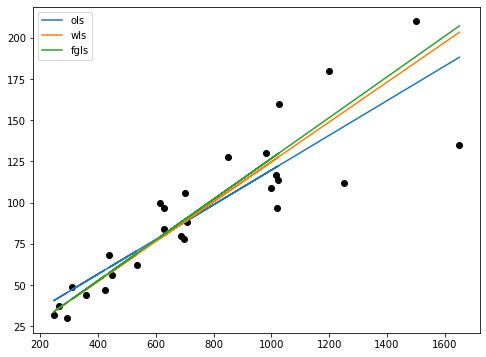

In [105]:
data['resid'] = data_lm.resid
data_resid_log = sm.formula.ols('np.log(resid**2)~X', data=data).fit()
h_hat = np.exp(data_resid_log.fittedvalues)
h_hat

data_lm_fgls = sm.formula.wls('Y~X', weights=1/h_hat, data=data).fit()
data_lm_fgls.summary()

fig, ax = plt.subplots(1,3, figsize=(13,6))

ax_now = ax[0]
ax_now.scatter(data.X, data_lm.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_ols')
ax_now.set_title('resid_ols | X')

ax_now = ax[1]
ax_now.scatter(data.X, data_lm_wls.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_wls')
ax_now.set_title('resid_wls | X')

ax_now = ax[2]
ax_now.scatter(data.X, data_lm_fgls.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_fgls')
ax_now.set_title('resid_fgls | X')

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data.X, data.Y, c='k')
ax.plot(data.X, data_lm.fittedvalues, label='ols')
ax.plot(data.X, data_lm_wls.fittedvalues, label='wls')
ax.plot(data.X, data_lm_fgls.fittedvalues, label='fgls')
ax.legend()

plt.show()

##### 2 从图上看，异方差没有消除.

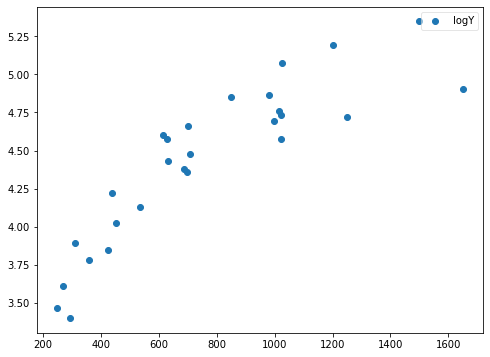

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data.X, np.log(data.Y), label='logY')
ax.legend(framealpha=0.5)
plt.show()

##### 3 就是第四问的 log(𝑌)=𝛽0+𝛽1𝑋+𝛽2𝑋2+𝑢

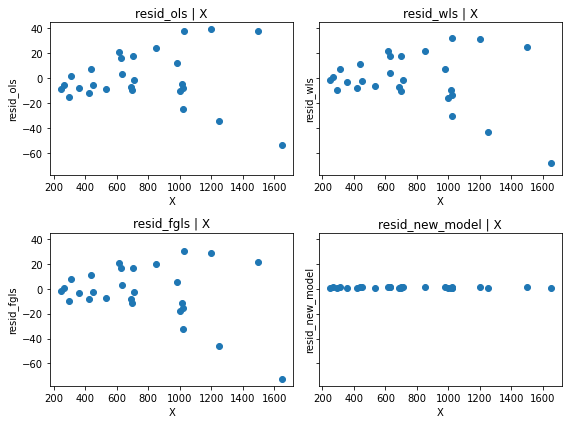

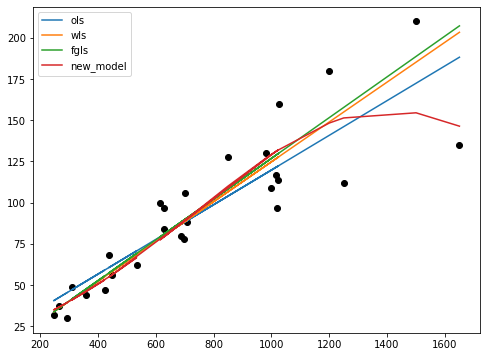

In [107]:
model = 'np.log(Y)~X+I(X**2)'
data_lm4 = sm.formula.ols(model, data=data).fit()

fig, ax = plt.subplots(2,2, figsize=(8,6), sharey=True)

ax_now = ax[0][0]
ax_now.scatter(data.X, data_lm.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_ols')
ax_now.set_title('resid_ols | X')

ax_now = ax[0][1]
ax_now.scatter(data.X, data_lm_wls.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_wls')
ax_now.set_title('resid_wls | X')

ax_now = ax[1][0]
ax_now.scatter(data.X, data_lm_fgls.resid)
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_fgls')
ax_now.set_title('resid_fgls | X')

ax_now = ax[1][1]
ax_now.scatter(data.X, np.exp(data_lm4.resid))
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_new_model')
ax_now.set_title('resid_new_model | X')
fig.tight_layout()

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data.X, data.Y, c='k')
ax.plot(data.X, data_lm.fittedvalues, label='ols')
ax.plot(data.X, data_lm_wls.fittedvalues, label='wls')
ax.plot(data.X, data_lm_fgls.fittedvalues, label='fgls')
ax.plot(data.X, np.exp(data_lm4.fittedvalues), label='new_model')
ax.legend()

plt.show()

##### 4 异方差情况得到显著改善！这里应该再用bp-test之类的，test一下

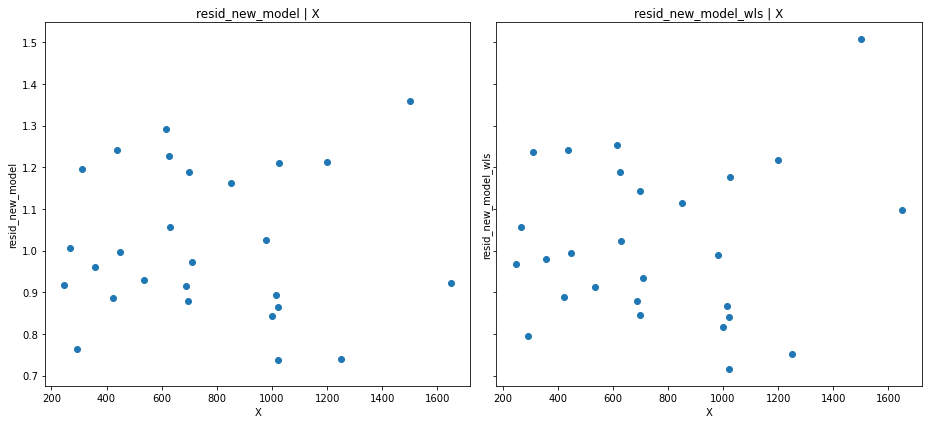

In [108]:
data_lm4_wls = sm.formula.wls('np.log(Y)~X+I(X**2)', weights=1/data.X**2, data=data).fit()

fig, ax = plt.subplots(1,2, figsize=(13,6), sharey=True)

ax_now = ax[0]
ax_now.scatter(data.X, np.exp(data_lm4.resid))
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_new_model')
ax_now.set_title('resid_new_model | X')

ax_now = ax[1]
ax_now.scatter(data.X, np.exp(data_lm4_wls.resid))
ax_now.set_xlabel('X')
ax_now.set_ylabel('resid_new_model_wls')
ax_now.set_title('resid_new_model_wls | X')

fig.tight_layout()

##### 5 有时不是异方差问题，而是模型假设出了问题。异方差的修正一般是建模后面的步骤；在建模初期，应该更关注自变量的形式与选取。